<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Иван! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<font color='blue' size=3><b>Комментарий ревьюера 2</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</font> 

<font color='blue' size=3><b>Комментарий ревьюера 3</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется.</font> 

### Описание проекта
Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма». \
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок! \
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье: 
- Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
- Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
try:
    import phik
except:
    !pip install phik
    import phik
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ❌\
<font color='red'> Ошибка исполнения кода - не все модули установлены в среду исполнения.\
Важно, чтобы код работал у тех, кому ты демонстрируешь свою работу.\
Воспроизводимость кода на платформе является критичным акритерием выполнения проекта. 👇</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, сгрупированы по функциональности. Можно ещё разделить группы пустой строкой.</font>

In [2]:
try:
    data_ferma_main = pd.read_csv("ferma_main.csv", sep = ';', decimal = ',')
except:
    data_ferma_main = pd.read_csv("/datasets/ferma_main.csv", sep = ';', decimal = ',')
try:
    data_cow_buy = pd.read_csv("cow_buy.csv", sep = ';', decimal = ',')
except:
    data_cow_buy = pd.read_csv("/datasets/cow_buy.csv", sep = ';', decimal = ',')
try:
    data_ferma_dad = pd.read_csv("ferma_dad.csv", sep = ';', decimal = ',')
except:
    data_ferma_dad = pd.read_csv("/datasets/ferma_dad.csv", sep = ';', decimal = ',')

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/ferma_dadcsv'

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ❌\
<font color='blue'> Всё таки, перезапускай тетрадки на платформе перед сдачей. Это всем сэкономит массу времени.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>~~При загрузке в Пандас разделитель дроби можно указывать аргументом `decimal = ','`, тогда данные загружаются в корректном типе данных.~~</font>

In [3]:
display(data_ferma_main.head(5))
display(data_cow_buy.head(5))
display(data_ferma_dad.head(5));

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Здорово, что вывод таблицы ограничен методом .head(). Иначе в выводах ячейки записывается весь Датафрейм, хоть он и не выводится на экран полностью. Такие Аутпуты сильно перегружают тетрадку.</font>

### Предобработка данных

В данных наблюдаются неудобные наименования колонок, следует записать их через нижний регистр и добавить разделитель '_'

In [4]:
data_ferma_main.columns = data_ferma_main.columns.str.lower()
data_cow_buy.columns = data_cow_buy.columns.str.lower()
data_ferma_dad.columns = data_ferma_dad.columns.str.lower()

In [5]:
display(data_ferma_main.head(5))
display(data_cow_buy.head(5))
display(data_ferma_dad.head(5));

,id,"удой, кг",эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


,id,имя папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [6]:
def add_sep_to_col(cols)->list:
    new_cols = []
    for i in cols:
        tmp = i.split(" ")
        new_cols.append("_".join(tmp))
    return new_cols
    

In [7]:
data_ferma_main.columns = add_sep_to_col(data_ferma_main.columns)
data_cow_buy.columns = add_sep_to_col(data_cow_buy.columns)
data_ferma_dad.columns = add_sep_to_col(data_ferma_dad.columns)
data_ferma_main.columns

Index(['id', 'удой,_кг', 'эке_(энергетическая_кормовая_единица)',
       'сырой_протеин,_г', 'спо_(сахаро-протеиновое_соотношение)', 'порода',
       'тип_пастбища', 'порода_папы_быка', 'жирность,%', 'белок,%',
       'вкус_молока', 'возраст'],
      dtype='object')

Теперь запомним единицы измерения в каждой колонке, затем отбросим из названия

In [8]:
def del_com_from_col(cols)->list:
    new_cols = []
    for i in cols:
        if (',' in i):
            tmp = i.split(',')
            new_cols.append("".join(tmp[0]))
        elif ('(' in i):
            tmp = i.split('_')
            new_cols.append("".join(tmp[0]))
        else:
            new_cols.append(i)
    return new_cols

In [9]:
data_ferma_main.columns = del_com_from_col(data_ferma_main.columns)
data_cow_buy.columns = del_com_from_col(data_cow_buy.columns)
data_ferma_dad.columns = del_com_from_col(data_ferma_dad.columns)
display(data_ferma_main.columns)
display(data_cow_buy.columns)
display(data_ferma_dad.columns)

Index(['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы_быка', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')

Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы',
       'текущая_жирность', 'текущий_уровень_белок', 'возраст'],
      dtype='object')

Index(['id', 'имя_папы'], dtype='object')

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

Теперь, отбросив лишнее, мы можем работать с данными удобным способом \
Проверим данные на наличие пропусков и дубликатов

In [10]:
data_ferma_main.isna().sum()

id                  0
удой                0
эке                 0
сырой_протеин       0
спо                 0
порода              0
тип_пастбища        0
порода_папы_быка    0
жирность            0
белок               0
вкус_молока         0
возраст             0
dtype: int64

In [11]:
data_cow_buy.isna().sum()

порода                   0
тип_пастбища             0
порода_папы_быка         0
имя_папы                 0
текущая_жирность         0
текущий_уровень_белок    0
возраст                  0
dtype: int64

In [12]:
data_ferma_dad.isna().sum()

id          0
имя_папы    0
dtype: int64

Пропусков в данных не обнаружено, проверим данные на явные дубликаты

In [13]:
data_ferma_main[data_ferma_main.duplicated()]

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


In [14]:
data_ferma_main = data_ferma_main.drop_duplicates().reset_index(drop = True)

In [15]:
data_cow_buy[data_cow_buy.duplicated()]

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [16]:
data_cow_buy = data_cow_buy.drop_duplicates().reset_index(drop = True)

In [17]:
data_ferma_dad.duplicated().sum()

0

Явные дубликаты удалены, но стоит взглянуть на уникальные значения в столбце `порода`, меня смущает написание `РефлешнСоверинг`

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Отлично! Удалили явные дубликаты.</font>

In [18]:
data_ferma_main['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

Стоит разделить эту породу на 2 слова, затем пройтись по всем str колонкам и сделать разделители '_'

In [19]:
data_ferma_main['порода'] = data_ferma_main['порода'].replace('РефлешнСоверинг', 'Рефлешн Cоверинг')

In [20]:
data_ferma_main['порода'].unique()

array(['Вис Бик Айдиал', 'Рефлешн Cоверинг'], dtype=object)

In [21]:
def add_seps_to_row(data_str):
    words = data_str.split()
    new_str = '_'.join([word.lower() for word in words])
    return new_str

for column in data_ferma_main.columns:
    if data_ferma_main[column].dtype == 'object':
        data_ferma_main[column] = data_ferma_main[column].apply(add_seps_to_row)
data_ferma_main

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,вис_бик_айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,вис_бик_айдиал,равнинные,соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,рефлешн_cоверинг,холмистое,соверин,3.59,3.074,не_вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,рефлешн_cоверинг,холмистое,айдиал,3.40,3.075,не_вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,вис_бик_айдиал,равнинные,соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,рефлешн_cоверинг,равнинное,айдиал,3.74,3.075,не_вкусно,более_2_лет
625,626,5513,12.9,1700,0.880,рефлешн_cоверинг,равнинное,соверин,3.64,3.073,вкусно,менее_2_лет
626,627,5970,14.4,1837,0.880,рефлешн_cоверинг,холмистое,соверин,3.64,3.075,не_вкусно,более_2_лет
627,628,5746,13.8,1994,0.890,рефлешн_cоверинг,равнинное,соверин,3.64,3.077,вкусно,более_2_лет


<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Датафреймы лучше всегда ограничивать методами .head(), .tail(), sample(). Иначе в выводах ячейки записывается весь Датафрейм, хоть он и не выводится на экран полностью. Такие Аутпуты сильно перегружают тетрадку.</font>

Выполним аналогичные действия для таблицы cow_buy

In [22]:
data_cow_buy['порода'] = data_cow_buy['порода'].replace('РефлешнСоверинг', 'Рефлешн Cоверинг')

In [23]:
for column in data_cow_buy.columns:
    if data_cow_buy[column].dtype == 'object':
        data_cow_buy[column] = data_cow_buy[column].apply(add_seps_to_row)
data_cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст
0,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
1,вис_бик_айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет
2,рефлешн_cоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
3,рефлешн_cоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет
4,рефлешн_cоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет
5,рефлешн_cоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет
6,вис_бик_айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет
7,рефлешн_cоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет
8,вис_бик_айдиал,холмистое,соверин,соловчик,3.73,3.055,более_2_лет
9,рефлешн_cоверинг,равнинное,соверин,геркулес,3.73,3.073,более_2_лет


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ⚠️\
<font color='darkorange'>Датафреймы лучше всегда ограничивать методами .head(), .tail(), sample(). Иначе в выводах ячейки записывается весь Датафрейм, хоть он и не выводится на экран полностью. Такие Аутпуты сильно перегружают тетрадку.</font>

Выведем информацию о типах данных для каждой из таблицы

In [24]:
data_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                629 non-null    int64  
 1   удой              629 non-null    int64  
 2   эке               629 non-null    float64
 3   сырой_протеин     629 non-null    int64  
 4   спо               629 non-null    float64
 5   порода            629 non-null    object 
 6   тип_пастбища      629 non-null    object 
 7   порода_папы_быка  629 non-null    object 
 8   жирность          629 non-null    float64
 9   белок             629 non-null    float64
 10  вкус_молока       629 non-null    object 
 11  возраст           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.1+ KB


In [25]:
data_ferma_main

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,вис_бик_айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,вис_бик_айдиал,равнинные,соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,рефлешн_cоверинг,холмистое,соверин,3.59,3.074,не_вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,рефлешн_cоверинг,холмистое,айдиал,3.40,3.075,не_вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,вис_бик_айдиал,равнинные,соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,рефлешн_cоверинг,равнинное,айдиал,3.74,3.075,не_вкусно,более_2_лет
625,626,5513,12.9,1700,0.880,рефлешн_cоверинг,равнинное,соверин,3.64,3.073,вкусно,менее_2_лет
626,627,5970,14.4,1837,0.880,рефлешн_cоверинг,холмистое,соверин,3.64,3.075,не_вкусно,более_2_лет
627,628,5746,13.8,1994,0.890,рефлешн_cоверинг,равнинное,соверин,3.64,3.077,вкусно,более_2_лет


В некоторых столбцах вместо '.' записана ',', потому не получается привести данные к float, стоит заменить знаки на точки и повторить приведения типов

In [26]:
def convert_to_float(value):
    if isinstance(value, str):
        value = value.replace(',', '.')
    try:
        return float(value)
    except ValueError:
        return value

need_cols = data_ferma_main.columns.drop('id')
for column in need_cols:
    data_ferma_main[column] = data_ferma_main[column].apply(convert_to_float)
data_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                629 non-null    int64  
 1   удой              629 non-null    float64
 2   эке               629 non-null    float64
 3   сырой_протеин     629 non-null    float64
 4   спо               629 non-null    float64
 5   порода            629 non-null    object 
 6   тип_пастбища      629 non-null    object 
 7   порода_папы_быка  629 non-null    object 
 8   жирность          629 non-null    float64
 9   белок             629 non-null    float64
 10  вкус_молока       629 non-null    object 
 11  возраст           629 non-null    object 
dtypes: float64(6), int64(1), object(5)
memory usage: 59.1+ KB


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ⚠️\
<font color='darkorange'>Все столбцы уже в нужном типе данных. Это действие лишнее.</font>

Повторим аналогичные дейтсвия для `data_cow_buy`

In [27]:
data_cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст
0,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
1,вис_бик_айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет
2,рефлешн_cоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
3,рефлешн_cоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет
4,рефлешн_cоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет
5,рефлешн_cоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет
6,вис_бик_айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет
7,рефлешн_cоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет
8,вис_бик_айдиал,холмистое,соверин,соловчик,3.73,3.055,более_2_лет
9,рефлешн_cоверинг,равнинное,соверин,геркулес,3.73,3.073,более_2_лет


In [28]:
for column in data_cow_buy.columns:
    data_cow_buy[column] = data_cow_buy[column].apply(convert_to_float)
data_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   порода                 16 non-null     object 
 1   тип_пастбища           16 non-null     object 
 2   порода_папы_быка       16 non-null     object 
 3   имя_папы               16 non-null     object 
 4   текущая_жирность       16 non-null     float64
 5   текущий_уровень_белок  16 non-null     float64
 6   возраст                16 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.0+ KB


Пропуски не были обнаружены, явные дубликаты удалены, типы приведены

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

Проверим данные на неявные дубликаты

In [29]:
for i in data_ferma_main:
    if (data_ferma_main[i].dtype != 'float64' and data_ferma_main[i].dtype != 'int64'):
        print(i)
        display(data_ferma_main[i].unique())

порода


array(['вис_бик_айдиал', 'рефлешн_cоверинг'], dtype=object)

тип_пастбища


array(['равнинное', 'равнинные', 'холмистое'], dtype=object)

порода_папы_быка


array(['айдиал', 'соверин', 'айдиалл'], dtype=object)

вкус_молока


array(['вкусно', 'не_вкусно'], dtype=object)

возраст


array(['более_2_лет', 'менее_2_лет'], dtype=object)

в колонках `тип_пастбища` и `порода_папы_быка` обнаружены неявные дубликаты, стоит их устранить

In [30]:
data_ferma_main['порода_папы_быка'] = data_ferma_main['порода_папы_быка'].replace('Айдиалл', 'Айдиал')
data_ferma_main['тип_пастбища'] = data_ferma_main['тип_пастбища'].replace('Равнинные', 'Равнинное')
for i in data_ferma_main:
    if (data_ferma_main[i].dtype != 'float64' and data_ferma_main[i].dtype != 'int64'):
        print(i)
        display(data_ferma_main[i].unique())

порода


array(['вис_бик_айдиал', 'рефлешн_cоверинг'], dtype=object)

тип_пастбища


array(['равнинное', 'равнинные', 'холмистое'], dtype=object)

порода_папы_быка


array(['айдиал', 'соверин', 'айдиалл'], dtype=object)

вкус_молока


array(['вкусно', 'не_вкусно'], dtype=object)

возраст


array(['более_2_лет', 'менее_2_лет'], dtype=object)

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

Теперь проверим данные на дубликаты

In [31]:
data_ferma_main.duplicated().sum()

0

Неявные дубликаты не выродились в явные, проделаем те же действия с таблицей `data_cow_buy`

In [32]:
for i in data_cow_buy:
    if (data_cow_buy[i].dtype != 'float64' and data_cow_buy[i].dtype != 'int64'):
        print(i)
        display(data_cow_buy[i].unique())

порода


array(['вис_бик_айдиал', 'рефлешн_cоверинг'], dtype=object)

тип_пастбища


array(['холмистое', 'равнинное'], dtype=object)

порода_папы_быка


array(['айдиал', 'соверин'], dtype=object)

имя_папы


array(['геркулес', 'буйный', 'барин', 'соловчик'], dtype=object)

возраст


array(['более_2_лет', 'менее_2_лет'], dtype=object)

Здесь все в порядке

In [33]:
data_ferma_dad['имя_папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

Здесь тоже все в порядке

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

### Вывод по предобработке данных
В ходе предобработки данных мне удалось выявить и устранить следующие проблемы:
- Привел названия колонок к нижнему регистру, убрал лишние слова и добавил корректные разделители
- Проверил данные на наличие пропущенных значений и явных дубликатов
- Устранил явные дубликаты
- Устранил неявные дубликат
- Выполнил приведение типов

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>Здорово, что не забываешь про промежуточные выводы.</font>

In [34]:
data_cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст
0,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
1,вис_бик_айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет
2,рефлешн_cоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
3,рефлешн_cоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет
4,рефлешн_cоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет
5,рефлешн_cоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет
6,вис_бик_айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет
7,рефлешн_cоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет
8,вис_бик_айдиал,холмистое,соверин,соловчик,3.73,3.055,более_2_лет
9,рефлешн_cоверинг,равнинное,соверин,геркулес,3.73,3.073,более_2_лет


### Исследовательский анализ данных

In [35]:
data_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                629 non-null    int64  
 1   удой              629 non-null    float64
 2   эке               629 non-null    float64
 3   сырой_протеин     629 non-null    float64
 4   спо               629 non-null    float64
 5   порода            629 non-null    object 
 6   тип_пастбища      629 non-null    object 
 7   порода_папы_быка  629 non-null    object 
 8   жирность          629 non-null    float64
 9   белок             629 non-null    float64
 10  вкус_молока       629 non-null    object 
 11  возраст           629 non-null    object 
dtypes: float64(6), int64(1), object(5)
memory usage: 59.1+ KB


Построим Гистограммы и ящик с усами для количественных признаков, для категориальных - столбчатые

In [36]:
cols_numeric = []
cols_categor = []
for i in data_ferma_main:
    if (data_ferma_main[i].dtype == 'float64' or data_ferma_main[i].dtype == 'int64'):
        if (i != 'id'):
            cols_numeric.append(i)
    else:
        cols_categor.append(i)
cols_numeric

['удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок']

In [37]:
data_ferma_main[cols_numeric[0]].describe()

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: удой, dtype: float64

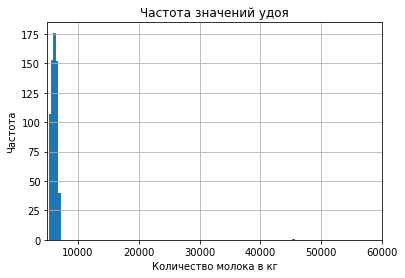

In [38]:
data_ferma_main[cols_numeric[0]].hist(bins = 100);
plt.xlim(5000, 60000)
plt.title("Частота значений удоя")
plt.ylabel("Частота")
plt.xlabel("Количество молока в кг")
plt.show()

Даже на диаграмме заметен выброс, равный 45616, стоит рассмотреть это значение, чтобы понять, почему такое значение получилось

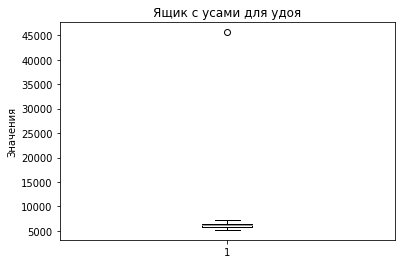

In [39]:
plt.boxplot(data_ferma_main[cols_numeric[0]])
plt.title("Ящик с усами для удоя")
plt.ylabel("Значения")
plt.show()

Построим график без выброса

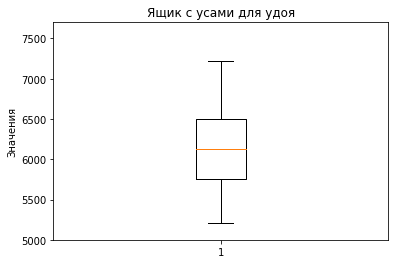

In [40]:
plt.boxplot(data_ferma_main[cols_numeric[0]])
plt.title("Ящик с усами для удоя")
plt.ylabel("Значения")
plt.ylim(5000, 7700)
plt.show()

Вычислим квантили для данного ящика

In [41]:
print(f"min = {data_ferma_main[cols_numeric[0]].min()}")
print(f"25% = {data_ferma_main[cols_numeric[0]].quantile(0.25)}")
print(f"50% = {data_ferma_main[cols_numeric[0]].quantile(0.50)}")
print(f"75% = {data_ferma_main[cols_numeric[0]].quantile(0.75)}")
print(f"max = {data_ferma_main[cols_numeric[0]].max()}")

min = 5204.0
25% = 5751.0
50% = 6133.0
75% = 6501.0
max = 45616.0


Медиана равна 6133 килограмм молока в год, минимальное значение составило 5204 килограмма, а вот максимальное значени подозрительно большое, стоит рассмотреть его отдельно

In [42]:
tmp_check = data_ferma_main.query('удой > 20000')
tmp_check

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
16,17,45616.0,11.5,1675.0,0.93,вис_бик_айдиал,холмистое,айдиалл,3.22,3.076,вкусно,более_2_лет


Попробуем сравнить похожих коров вместе с этой

In [43]:
tmp_check = data_ferma_main.query('порода == "Вис_Бик_Айдиал" and возраст == "более_2_лет"')
tmp_check.sort_values(by = 'удой', ascending = False)

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст


Сузим данные еще больше

In [44]:
tmp_check = tmp_check.query('вкус_молока == "вкусно" and сырой_протеин < 1850 and сырой_протеин > 1500 and тип_пастбища == "Холмистое"')
tmp_check.sort_values(by = 'удой', ascending = False)

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст


Скорее всего люди допустили опечатку, потому получилось такое аномальное значение, я возьму медианное значение из tmp_check для заполнения

In [45]:
data_ferma_main.loc[data_ferma_main['удой'] > 25000, 'удой'] = tmp_check['удой'].median()
display(data_ferma_main['удой'].describe())

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: удой, dtype: float64

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

In [46]:
cols_numeric

['удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок']

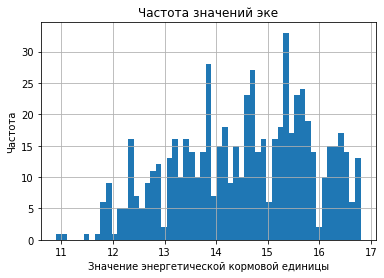

In [47]:
data_ferma_main[cols_numeric[1]].hist(bins = len(data_ferma_main[cols_numeric[1]].unique()));
plt.title("Частота значений эке")
plt.ylabel("Частота")
plt.xlabel("Значение энергетической кормовой единицы")
plt.show()

Наблюдаем немного скошенное вправо распределение, чем-то напоминающее нормальное, но наблюдается некоторые повышенные значения, построим ящик с усами:

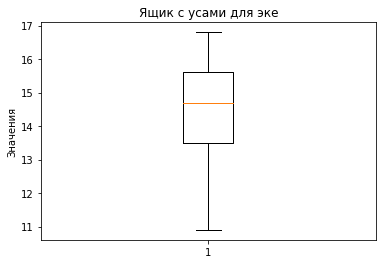

In [48]:
plt.boxplot(data_ferma_main[cols_numeric[1]])
plt.title("Ящик с усами для эке")
plt.ylabel("Значения")
plt.show()

По диаграмме можно сказать, что выбросов не наблюдается, значение медианы почти достигает 15 единиц, выведем информацию о квантилях и мин/макс значениях в данном столбце:

In [49]:
data_ferma_main[cols_numeric[1]].describe()

count    629.000000
mean      14.543879
std        1.306408
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке, dtype: float64

Считаю данные корректными, оставим все как есть и рассмотреть следующий количественный столбец:

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

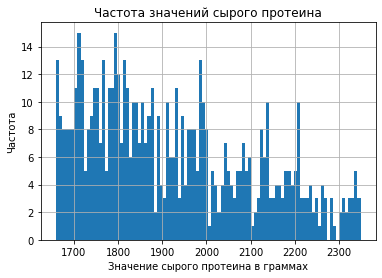

In [50]:
data_ferma_main[cols_numeric[2]].hist(bins = 100);
plt.title("Частота значений сырого протеина")
plt.ylabel("Частота")
plt.xlabel("Значение сырого протеина в граммах")
plt.show()

Распределение чем-то похоже на распределение пуассона за счет большой частоты данных в начале координат и уменьшением частоты с ростом значения протеина, но все же тяжело дать характерное название для данного распределения.

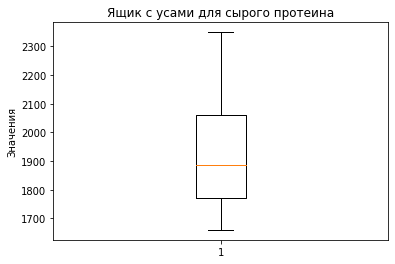

In [51]:
plt.boxplot(data_ferma_main[cols_numeric[2]])
plt.title("Ящик с усами для сырого протеина")
plt.ylabel("Значения")
plt.show()

In [52]:
data_ferma_main[cols_numeric[2]].describe()

count     629.000000
mean     1923.364070
std       182.956251
min      1660.000000
25%      1771.000000
50%      1888.000000
75%      2062.000000
max      2349.000000
Name: сырой_протеин, dtype: float64

Аналогично предыдущему столбцу не наблюдаются выбросы, следовательно никаких операций по улучшении данных производить не стоит.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

По диаграмме видно, что медианное значение почти достигает 1900 грамм, при этом максимальное и минимальное значение равно 2349 и 1660 грамм соответственно.

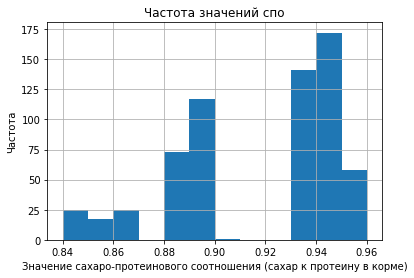

In [53]:
data_ferma_main[cols_numeric[3]].hist(bins = len(data_ferma_main[cols_numeric[3]].unique()));
plt.title("Частота значений спо")
plt.ylabel("Частота")
plt.xlabel("Значение сахаро-протеинового соотношения (сахар к протеину в корме)")
plt.show()

Распределение не является нормальным, отчетливо видно пик в значениях после 0.94

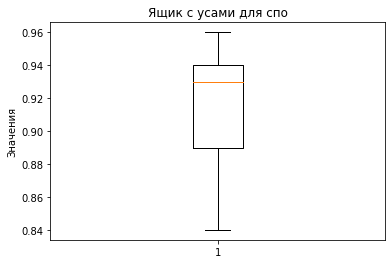

In [54]:
plt.boxplot(data_ferma_main[cols_numeric[3]])
plt.title("Ящик с усами для спо")
plt.ylabel("Значения")
plt.show()

In [55]:
data_ferma_main[cols_numeric[3]].describe()

count    629.000000
mean       0.913116
std        0.032203
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо, dtype: float64

По диаграмме видно, что медианна достигает почти 0,95, а минимальное значение равно 0,84, максимальное - 0,96. \
Выбросы не обнаружены, потому данные можно считать хорошими и оставить как есть.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

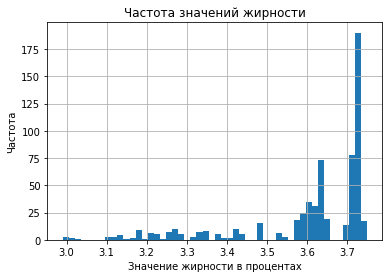

In [56]:
data_ferma_main[cols_numeric[4]].hist(bins = len(data_ferma_main[cols_numeric[4]].unique()));
plt.title("Частота значений жирности")
plt.ylabel("Частота")
plt.xlabel("Значение жирности в процентах")
plt.show()

Распределение не является нормальным, наблюдается пик значений в районе 3.6, 3.7

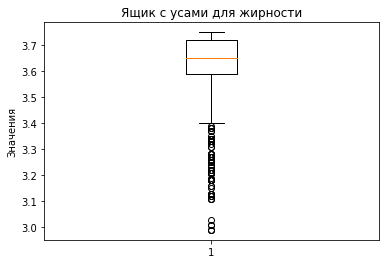

In [57]:
plt.boxplot(data_ferma_main[cols_numeric[4]])
plt.title("Ящик с усами для жирности")
plt.ylabel("Значения")
plt.show()

По диаграмме заметны выбросы, значения которых меньше q1 - 1.5*iqr

In [58]:
print(f"Значение нижней границы {data_ferma_main[cols_numeric[4]].quantile(0.25) - 1.5 * stats.iqr(data_ferma_main[cols_numeric[4]])}")

Значение нижней границы 3.3949999999999996


In [59]:
data_ferma_main[cols_numeric[4]].describe()

count    629.000000
mean       3.603657
std        0.168656
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность, dtype: float64

Думаю нельзя считать эти данные неверными, так как вполне реально получать не такое жирное молоко, конечно по статистике молока с меньшим количеством жирности меньше, но все же это вполне нормально. \
Потому оставим данные как есть.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

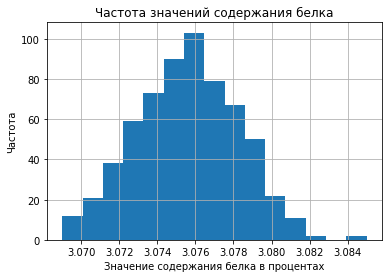

In [60]:
data_ferma_main[cols_numeric[5]].hist(bins = len(data_ferma_main[cols_numeric[5]].unique()));
plt.title("Частота значений содержания белка")
plt.ylabel("Частота")
plt.xlabel("Значение содержания белка в процентах")
plt.show()

Распределение является нормальным с медианной в районе 3.076 процента белка, посмотрим выбросы:

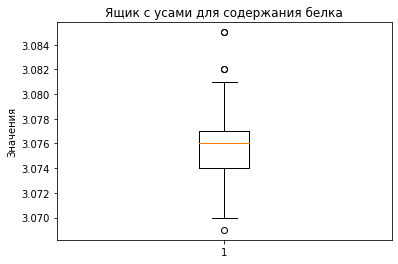

In [61]:
plt.boxplot(data_ferma_main[cols_numeric[5]])
plt.title("Ящик с усами для содержания белка")
plt.ylabel("Значения")
plt.show()

Заметны три выброса, скорее всего это просто уникальные значения в единичном экземпляре. Так как стандартное отклонение крайне мало, то не будем удалять данные значения

In [62]:
data_ferma_main[cols_numeric[5]].describe()

count    629.000000
mean       3.075671
std        0.002549
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок, dtype: float64

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

Теперь рассмотрим категориальные переменные:

In [63]:
cols_categor

['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']

In [64]:
data_ferma_main[cols_categor[0]].unique()

array(['вис_бик_айдиал', 'рефлешн_cоверинг'], dtype=object)

In [65]:
data_ferma_main.pivot_table(index = cols_categor[0], values = 'id', aggfunc = 'count')

,id
порода,
вис_бик_айдиал,373
рефлешн_cоверинг,256


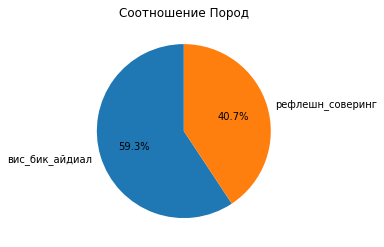

Соотношение: 1.45703125


In [66]:
data_type_group = data_ferma_main.pivot_table(index = cols_categor[0], values = 'id', aggfunc = 'count')

plt.pie(data_type_group['id'], labels=data_type_group.index, autopct='%1.1f%%', startangle=90)
plt.title('Соотношение Пород')
plt.show()
print(f"Соотношение: {data_type_group['id'][0] / data_type_group['id'][1]}")

Как видно по диаграмме, коров породы Вис Бик Айдиал больше чем коров породы Рефлешн Соверинг примерно в 1.46 раза

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

Проделаем то же самое для других категориальных данных

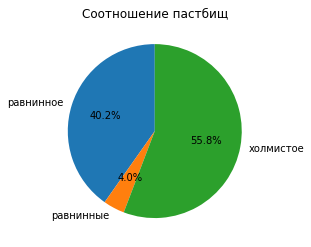

Соотношение: 0.09881422924901186


In [67]:
data_type_type = data_ferma_main.pivot_table(index = cols_categor[1], values = 'id', aggfunc = 'count')

plt.pie(data_type_type['id'], labels=data_type_type.index, autopct='%1.1f%%', startangle=90)
plt.title('Соотношение пастбищ')
plt.show()
print(f"Соотношение: {data_type_type['id'][1] / data_type_type['id'][0]}")

Как видно по диаграмме, Холмистых пастбищ примерно в 1.26 больше чем равнинных.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

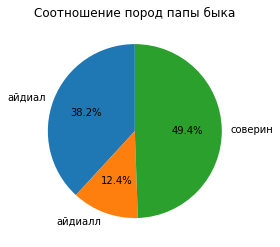

Соотношение: 0.09881422924901186


In [68]:
data_type_group_father = data_ferma_main.pivot_table(index = cols_categor[2], values = 'id', aggfunc = 'count')

plt.pie(data_type_group_father['id'], labels=data_type_group_father.index, autopct='%1.1f%%', startangle=90)
plt.title('Соотношение пород папы быка')
plt.show()
print(f"Соотношение: {data_type_type['id'][1] / data_type_type['id'][0]}")

Быков, чьи папы породы Айдиал примерно столько же, сколько быков, чьи папы породы Соверин.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

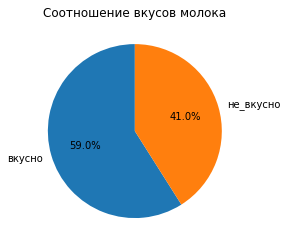

Соотношение: 1.437984496124031


In [69]:
data_type_taste_milk = data_ferma_main.pivot_table(index = cols_categor[3], values = 'id', aggfunc = 'count')

plt.pie(data_type_taste_milk['id'], labels=data_type_taste_milk.index, autopct='%1.1f%%', startangle=90)
plt.title('Соотношение вкусов молока')
plt.show()
print(f"Соотношение: {data_type_taste_milk['id'][0] / data_type_taste_milk['id'][1]}")

По диаграмме заметно, что вкусного молока примерно в 1.44 раза больше чем не вкусного, но все же процент не вкусного молока внушительный (41%)

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

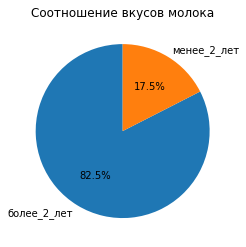

Соотношение: 4.718181818181818


In [70]:
data_type_age = data_ferma_main.pivot_table(index = cols_categor[4], values = 'id', aggfunc = 'count')

plt.pie(data_type_age['id'], labels=data_type_age.index, autopct='%1.1f%%', startangle=90)
plt.title('Соотношение вкусов молока')
plt.show()
print(f"Соотношение: {data_type_age['id'][0] / data_type_age['id'][1]}")

По диаграмме видно, что быков старше двух лет почти в 5 раз больше быков младше двух

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

### Вывод по исследовательскому анализу
В ходе исследовательского анализа удалось разделить данные на количественные и категориальные, затем провести анализ каждого столбца путем построения диаграмм, можно выделить следующие важные факты:
- обнаружен выброс в столбце удоя, было принято решение заменить его наиболее подходящим по другим параметрам коровы (медианным среди подобных коров), скорее всего произошла опечатка в ходе заполнения данных, так как данное значение слишком сильное превосходит все другие значения в столбце.
- наблюдаем немного скошенное вправо распределение, чем-то напоминающее нормальное, для стобца ЭКЕ, данные корректны и не содержат выбросов. Минимальное значени - 10.9, медианное значение - 14.7, максимальное значение - 16.8. 
- в столбце содержания сырого протеина также не обнаружено никаких выбросов, потому никаких всопомогательных операций по улучшению данных не производилось. Медианное значение почти достигает 1900 грамм, при этом максимальное и минимальное значение равно 2349 и 1660 грамм соответственно. Распределение чем-то похоже на распределение пуассона за счет большой частоты данных в начале координат и уменьшением частоты с ростом значения протеина, но все же тяжело дать характерное название для данного распределения.
- в столбце сахаро-протеинового соотношения не обнаружено никаких выбросов. Медианна достигает почти 0.95, а минимальное значение равно 0.84, максимальное - 0.96. Распределение не является нормальным, отчетливо видно пик в значениях после 0.94
- в столбце процентного содержания жира в молоке были обнаружены выбросы, но думаю нельзя считать эти данные неверными, так как вполне реально получать не такое жирное молоко. Распределение не является нормальным, наблюдается пик значений в районе 3.6, 3.7
- в столбце содержания белка были обнаружены выбросы, скорее всего это просто уникальные значения в единичном экземпляре. Так как стандартное отклонение крайне мало, то не будем удалять данные значения. Распределение является нормальным с медианной в районе 3.076 процента белка
- коров породы Вис Бик Айдиал больше чем коров породы Рефлешн Соверинг примерно в 1.46 раза.
- холмистых пастбищ примерно в 1.26 больше чем равнинных.
- быков, чьи папы породы Айдиал примерно столько же, сколько быков, чьи папы породы Соверин.
- вкусного молока примерно в 1.44 раза больше чем не вкусного, но все же процент не вкусного молока внушительный (41%).
- быков старше двух лет почти в 5 раз больше быков младше двух.

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Нужно проверить нормальность распределений количественных признаков.~~</font>

### Корреляционный анализ признаков

Построим матрицу корреляции для датасета `data_ferma_main`

In [71]:
data_ferma_main.drop('id',  axis=1).phik_matrix()

interval columns not set, guessing: ['удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок']


,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
удой,1.000000,0.719239,0.465118,0.661615,0.161643,0.265755,0.442789,0.706516,0.063045,0.178281,0.998071
эке,0.719239,1.000000,0.461466,0.589307,0.129219,0.108445,0.132965,0.717846,0.000000,0.271287,0.768438
сырой_протеин,0.465118,0.461466,1.000000,0.385900,0.091102,0.088735,0.000000,0.401560,0.204052,0.171465,0.351685
спо,0.661615,0.589307,0.385900,1.000000,0.064396,0.233880,0.449008,0.644730,0.074004,0.569538,0.744653
порода,0.161643,0.129219,0.091102,0.064396,1.000000,0.083350,0.034833,0.223584,0.361880,0.000000,0.055837
тип_пастбища,0.265755,0.108445,0.088735,0.233880,0.083350,1.000000,0.596085,0.000000,0.159604,0.104760,0.067012
порода_папы_быка,0.442789,0.132965,0.000000,0.449008,0.034833,0.596085,1.000000,0.269917,0.113401,0.000000,0.150951
жирность,0.706516,0.717846,0.401560,0.644730,0.223584,0.000000,0.269917,1.000000,0.000000,0.198952,0.674410
белок,0.063045,0.000000,0.204052,0.074004,0.361880,0.159604,0.113401,0.000000,1.000000,0.145850,0.000000
вкус_молока,0.178281,0.271287,0.171465,0.569538,0.000000,0.104760,0.000000,0.198952,0.145850,1.000000,0.166869


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Здорорво,что применена `phik` для анализа и нелинейных зависимостей</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='blue'>Обрати внимание, При использовании `phik` крайне важно настроить параметр `interval_cols`, передав ему список с названиями непрерывных признаков.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Признак 'id' в корреляционном анализе не имеет смысла.~~</font>

Теперь нам известны все коэффиценты корреляции между признаками, исследуем то, как признаки влияют на целевой признак `удой`


In [72]:
data_ferma_main.drop('id',  axis=1).phik_matrix()['удой'].sort_values(ascending = False)

interval columns not set, guessing: ['удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок']


удой                1.000000
возраст             0.998071
эке                 0.719239
жирность            0.706516
спо                 0.661615
сырой_протеин       0.465118
порода_папы_быка    0.442789
тип_пастбища        0.265755
вкус_молока         0.178281
порода              0.161643
белок               0.063045
Name: удой, dtype: float64

Можно заметить, что `порода_папы_быка`, `спо`, `жирность`, `эке`, `возраст` более чем заметно коррелируют с нашим целевым признаком согласно шкале Чеддока. Другой вопрос, линейно независимы ли эти столбцы? будет плохим решением составлять матрицу features из линейно зависимых векторов, потому в дальнейшем при подготовке данных перед обучением модели не забудем проверить векторы на ЛНЗ

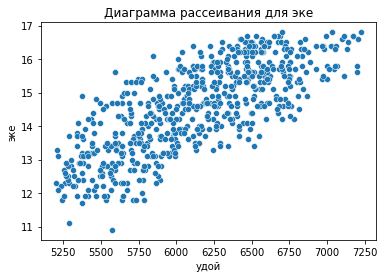

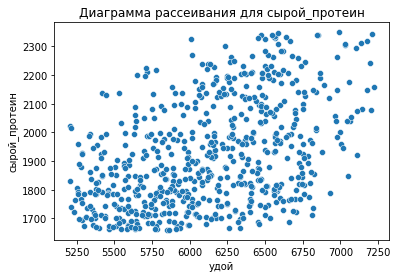

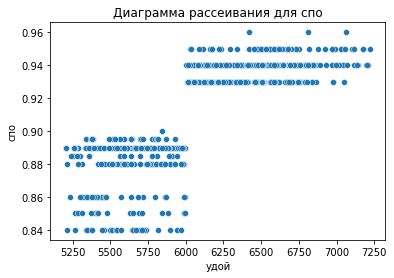

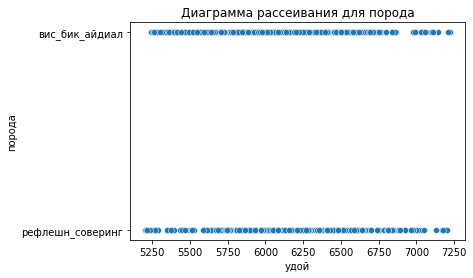

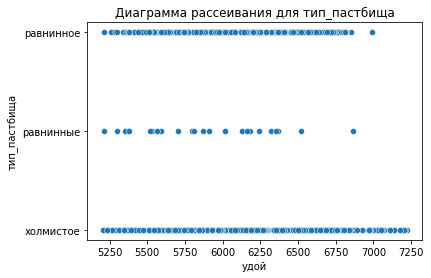

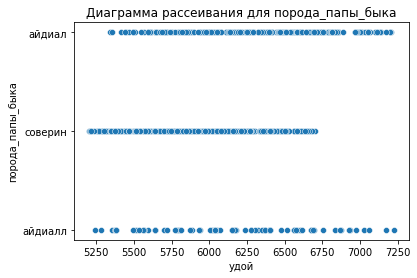

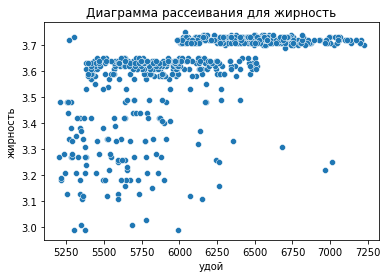

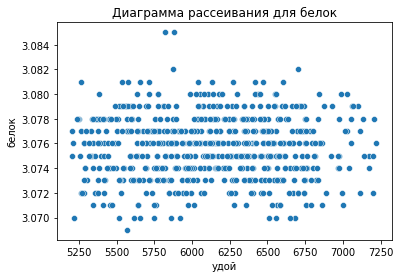

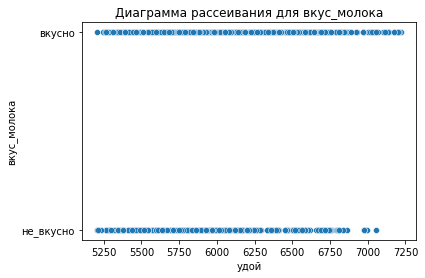

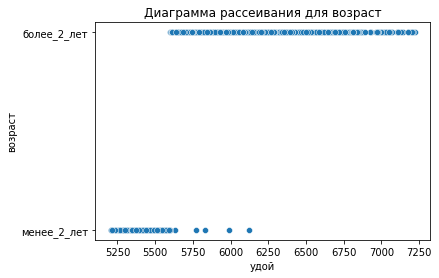

In [73]:
need_cols = data_ferma_main.drop(['id', 'удой'], axis=1).columns

for i in need_cols:
    sns.scatterplot(x = 'удой', y = i, data = data_ferma_main)
    plt.title(f'Диаграмма рассеивания для {i}')
    plt.show()

эке очень напоминает линейную зависимость, так же можно сказать про показатель сырого протеина, коэффицент корреляции меньше, но линейная зависимость также наблюдается. Для спо мы наблюдаем график не похожий на предыдущие, но также напоминает линейную зависимость.\
В диаграмме жирности мы наблюдаем линейную зависимость похожую как с спо, но `выбросы` показывают, что никак не коррелируют целевым признаком, при обучении модели нужно будет отбросить эти значения, возможно они ухудшат показатели модели. \
Белок почти никак не коррелирует с целевым признаком. \
По диаграммам категориальных признаков можно сказать, как распределены те или иные признаки относительно значений удоя, а именно:
- Так как породы распределены почти одинаково, то очевидно, что коэффицент корреляции будет мал (0,16)
- Тип пастбища показывает, что максимальное значение удоя наблюдается именно на холимостом пастбище, но коэффицент все же мал
- Коэффицент корреляции от породы папы быка заметный (0,51), по диаграмме заметно, что быки с папами-Айдиалами могут приносить больше удоя
- По диаграмме видно, что вкус молока имеет слабую корреляцию с целевым признаком, скорее всего это связано с тем, что 41% не вкусного молока все же внушительное значение, потому и встречается оно довольно часто
- В свою очередь возраст сильно коррелирует с показателем удоя, коровы с возрастом более двух лет почти гарантированно будут приносить больше удоя чем молодые коровы

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

In [74]:
lower_bound_fat = data_ferma_main[cols_numeric[4]].quantile(0.25) - 1.5 * stats.iqr(data_ferma_main[cols_numeric[4]])
data_ferma_main = data_ferma_main.query('жирность > @lower_bound_fat')

Взглянем на матрицу корреляции еще раз, чтобы выявить линейно зависимые столбцы

In [75]:
data_ferma_main.drop('id',  axis=1).phik_matrix()

interval columns not set, guessing: ['удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок']


,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
удой,1.000000,0.700580,0.397644,0.663398,0.107655,0.255408,0.470537,0.698525,0.000000,0.137477,0.998928
эке,0.700580,1.000000,0.388936,0.603654,0.124038,0.160687,0.096032,0.702138,0.000000,0.303141,0.739137
сырой_протеин,0.397644,0.388936,1.000000,0.352804,0.000000,0.133450,0.000000,0.319664,0.213966,0.149871,0.239235
спо,0.663398,0.603654,0.352804,1.000000,0.155305,0.251480,0.470503,0.629496,0.109384,0.583759,0.718933
порода,0.107655,0.124038,0.000000,0.155305,1.000000,0.074801,0.033668,0.336785,0.367662,0.000000,0.095918
тип_пастбища,0.255408,0.160687,0.133450,0.251480,0.074801,1.000000,0.565926,0.243840,0.181689,0.074581,0.036270
порода_папы_быка,0.470537,0.096032,0.000000,0.470503,0.033668,0.565926,1.000000,0.425405,0.121228,0.000000,0.149447
жирность,0.698525,0.702138,0.319664,0.629496,0.336785,0.243840,0.425405,1.000000,0.222480,0.175315,0.506307
белок,0.000000,0.000000,0.213966,0.109384,0.367662,0.181689,0.121228,0.222480,1.000000,0.147270,0.000000
вкус_молока,0.137477,0.303141,0.149871,0.583759,0.000000,0.074581,0.000000,0.175315,0.147270,1.000000,0.099328


Для удобства построим квадратную матрицу признаков, где наблюдается хотя бы заметная корреляция с целевым признаком

In [76]:
correlation_matrix = data_ferma_main.phik_matrix()

selected_columns = correlation_matrix.columns[correlation_matrix['удой'] >= 0.45]
selected_data = correlation_matrix.loc[selected_columns, selected_columns]
selected_data

interval columns not set, guessing: ['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок']


,удой,эке,спо,порода_папы_быка,жирность,возраст
удой,1.000000,0.700580,0.663398,0.470537,0.698525,0.998928
эке,0.700580,1.000000,0.603654,0.096032,0.702138,0.739137
спо,0.663398,0.603654,1.000000,0.470503,0.629496,0.718933
порода_папы_быка,0.470537,0.096032,0.470503,1.000000,0.425405,0.149447
жирность,0.698525,0.702138,0.629496,0.425405,1.000000,0.506307
возраст,0.998928,0.739137,0.718933,0.149447,0.506307,1.000000


Стоит обратить внимание на признаки, корреляция с удоем которых вполне объяснима на основе фактов реальной жизни. Например факторы молока вряд ли влияют на корову, скорее корова влияет на них, потому жирность и содержание белка можно отбросить сразу. следовательно будет логичным на основе корреляции составить следующую матрицу признаков: \
$X_{\text{features}} = ||\vec{v}_{\text{спо}} \quad \vec{v}_{\text{эке}} \quad \vec{v}_{\text{возраст}} \quad \vec{v}_{\text{порода_папы_быка}} ||$, $v_{\text{target}} = \text{удой}$

In [77]:
selected_data_indep = selected_data.drop(['жирность']).loc[:, ~selected_data.columns.isin(['жирность'])]
selected_data_indep

,удой,эке,спо,порода_папы_быка,возраст
удой,1.000000,0.700580,0.663398,0.470537,0.998928
эке,0.700580,1.000000,0.603654,0.096032,0.739137
спо,0.663398,0.603654,1.000000,0.470503,0.718933
порода_папы_быка,0.470537,0.096032,0.470503,1.000000,0.149447
возраст,0.998928,0.739137,0.718933,0.149447,1.000000


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>~~Жирность характеристики самого молока, а не питания коровы. Эти харакетристики зависят от питания, породы итд - и коррелируют с удоем, но не связаны с ним причинно-следственными связями и не влияют на него. Нам важно отобрать те признаки, которые влияют на таргет.~~</font>

### Вывод по корреляционному анализу
По диаграммам видно, что эке очень напоминает линейную зависимость, так же можно сказать про показатель сырого протеина, коэффицент корреляции меньше, но линейная зависимость также наблюдается. Для спо мы наблюдаем график не похожий на предыдущие, но также напоминает линейную зависимость. \
В диаграмме жирности мы наблюдаем линейную зависимость похожую как с спо, но `выбросы` показывают, что никак не коррелируют целевым признаком, при обучении модели нужно будет отбросить эти значения, возможно они ухудшат показатели модели. \
Белок почти никак не коррелирует с целевым признаком. \
По диаграммам категориальных признаков можно сказать, как распределены те или иные признаки относительно значений удоя, а именно:
- Так как породы распределены почти одинаково, то очевидно, что коэффицент корреляции будет мал (0,16)
- Тип пастбища показывает, что максимальное значение удоя наблюдается именно на холимостом пастбище, но коэффицент все же мал
- Коэффицент корреляции от породы папы быка заметный (0,51), по диаграмме заметно, что быки с папами-Айдиалами могут приносить больше удоя
- По диаграмме видно, что вкус молока имеет слабую корреляцию с целевым признаком, скорее всего это связано с тем, что 41% не вкусного молока все же внушительное значение, потому и встречается оно довольно часто
- В свою очередь возраст сильно коррелирует с показателем удоя, коровы с возрастом более двух лет почти гарантированно будут приносить больше удоя чем молодые коровы
- Стоит обратить внимание на признаки, корреляция с удоем которых вполне объяснима на основе фактов реальной жизни. Например факторы молока вряд ли влияют на корову, скорее корова влияет на них, потому жирность и содержание белка можно отбросить сразу. следовательно будет логичным на основе корреляции составить следующую матрицу признаков: \
$X_{\text{features}} = ||\vec{v}_{\text{спо}} \quad \vec{v}_{\text{эке}} \quad \vec{v}_{\text{возраст}} \quad \vec{v}_{\text{порода_папы_быка}} ||$, $v_{\text{target}} = \text{удой}$

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Нужно ометить какие признаки зависят нелинейно или склонны к кластеризации. Это мы будем проверять второй моделью. </font>

###  Задача регрессии

Теперь можно обучить модель на векторах, которые мы сочли наиболее походящиими, а именно из матрицы $X_{\text{features}}$ \
Я думаю вполне логично, что молодые коровы приносят не так много молока, как те, что постарше, само собой слишком старые коровы навряд-ли приносят еще больше. Также жирность зависит от удоя, возможно большая жирность пресуща большому количеству удоя коровы. Также скорее всего особенность породы папы быка влияет на удой, наверное одна из пород генетически приносит больше удоя


In [78]:
need_data = data_ferma_main.loc[:, ['удой', 'порода_папы_быка', 'возраст', 'спо', 'эке']]
need_data

,удой,порода_папы_быка,возраст,спо,эке
0,5863.0,айдиал,более_2_лет,0.890,14.2
1,5529.0,соверин,менее_2_лет,0.890,12.8
2,5810.0,соверин,более_2_лет,0.885,14.0
3,5895.0,айдиал,более_2_лет,0.885,12.4
4,5302.0,соверин,менее_2_лет,0.885,12.8
...,...,...,...,...,...
624,6812.0,айдиал,более_2_лет,0.940,15.4
625,5513.0,соверин,менее_2_лет,0.880,12.9
626,5970.0,соверин,более_2_лет,0.880,14.4
627,5746.0,соверин,более_2_лет,0.890,13.8


R^2 Score: 0.6949120700043426
RMSE = 238.21530054084417


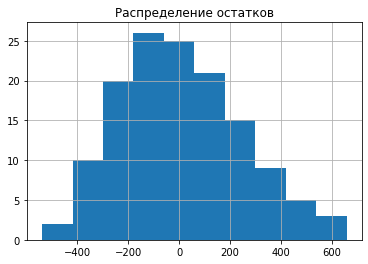

12.029411764705882

In [79]:
X = need_data.drop('удой', axis = 1)
y = need_data['удой']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
categorical_cols = ['порода_папы_быка', 'возраст']
numeric_cols = ['спо']
model_lr = LinearRegression()
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])

X_test_encoded = encoder.transform(X_test[categorical_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

X_train_processed = pd.concat([pd.DataFrame(X_train_scaled, columns=numeric_cols), pd.DataFrame(X_train_encoded.toarray(), columns=encoder.get_feature_names(categorical_cols))], axis=1)
X_test_processed = pd.concat([pd.DataFrame(X_test_scaled, columns=numeric_cols), pd.DataFrame(X_test_encoded.toarray(), columns=encoder.get_feature_names(categorical_cols))], axis=1)
model_lr.fit(X_train_processed, y_train)
predictions = model_lr.predict(X_test_processed)
r2 = r2_score(y_test, predictions)
residuals = pd.DataFrame({'y_test': y_test, 'predictions': predictions})
residuals['diff'] = residuals['y_test'] - residuals['predictions'] 
print(f'R^2 Score: {r2}')
print(f'RMSE = {mean_squared_error(y_test, predictions, squared = False)}')
residuals['diff'].hist(bins = 10)
plt.title('Распределение остатков')
plt.show()
residuals['diff'].mean()

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Очень слабая метрика. Советую расширить признаки.</font>

График остатков напоминает симметрическое нормальное распределение, а значит модель в целом работает неплохо, но вот показатель mean выше 0 на 10 значений, а значит распределение все-таки несимметрическое, и модель чаще дает заниженные предсказания

Коэффицент детерминации равен 0.69, что в принципе неплохо, но согласно RMSE модель ошибается в среднем на 237.9, попробуем добавить еще признаков, чтобы улучшить модель

In [80]:
need_data_sec = data_ferma_main.loc[:, ['удой', 'порода_папы_быка', 'возраст', 'спо', 'эке']]
need_data_sec

,удой,порода_папы_быка,возраст,спо,эке
0,5863.0,айдиал,более_2_лет,0.890,14.2
1,5529.0,соверин,менее_2_лет,0.890,12.8
2,5810.0,соверин,более_2_лет,0.885,14.0
3,5895.0,айдиал,более_2_лет,0.885,12.4
4,5302.0,соверин,менее_2_лет,0.885,12.8
...,...,...,...,...,...
624,6812.0,айдиал,более_2_лет,0.940,15.4
625,5513.0,соверин,менее_2_лет,0.880,12.9
626,5970.0,соверин,более_2_лет,0.880,14.4
627,5746.0,соверин,более_2_лет,0.890,13.8


R^2 Score: 0.7754902036947712
RMSE = 204.3500684491699


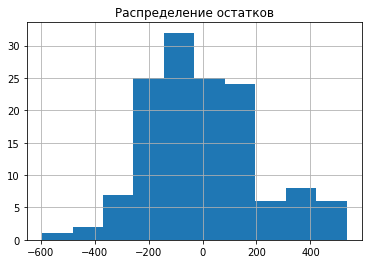

-1.1163491901779372

In [81]:
X = need_data.drop('удой', axis = 1)
y = need_data['удой']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
categorical_cols = ['порода_папы_быка', 'возраст']
numeric_cols = ['спо', 'эке']
model_lr = LinearRegression()
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])

X_test_encoded = encoder.transform(X_test[categorical_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

X_train_processed = pd.concat([pd.DataFrame(X_train_scaled, columns=numeric_cols), pd.DataFrame(X_train_encoded.toarray(), columns=encoder.get_feature_names(categorical_cols))], axis=1)
X_test_processed = pd.concat([pd.DataFrame(X_test_scaled, columns=numeric_cols), pd.DataFrame(X_test_encoded.toarray(), columns=encoder.get_feature_names(categorical_cols))], axis=1)
model_lr.fit(X_train_processed, y_train)
predictions = model_lr.predict(X_test_processed)
r2 = r2_score(y_test, predictions)
residuals = pd.DataFrame({'y_test': y_test, 'predictions': predictions})
residuals['diff'] = residuals['y_test'] - residuals['predictions'] 
print(f'R^2 Score: {r2}')
print(f'RMSE = {mean_squared_error(y_test, predictions, squared = False)}')
residuals['diff'].hist(bins = 10)
plt.title('Распределение остатков')
plt.show()
residuals['diff'].mean()

Показатель R^2 повысился почти на 0.08, попробуем добавить еще признаки для повышения качества. Показатель mean чуть чуть больше -1 по модулю, значит модель чаще завышает предсказания. Нам желательно получить такую модель, предсказания которой будут слегка заниженными, потому попробуем добавить признак, хорошо коррелирующий с удоем

In [82]:
need_data_th = data_ferma_main.loc[:, ['удой', 'порода_папы_быка', 'жирность', 'возраст', 'эке', 'спо']]
need_data_th

,удой,порода_папы_быка,жирность,возраст,эке,спо
0,5863.0,айдиал,3.58,более_2_лет,14.2,0.890
1,5529.0,соверин,3.54,менее_2_лет,12.8,0.890
2,5810.0,соверин,3.59,более_2_лет,14.0,0.885
3,5895.0,айдиал,3.40,более_2_лет,12.4,0.885
4,5302.0,соверин,3.73,менее_2_лет,12.8,0.885
...,...,...,...,...,...,...
624,6812.0,айдиал,3.74,более_2_лет,15.4,0.940
625,5513.0,соверин,3.64,менее_2_лет,12.9,0.880
626,5970.0,соверин,3.64,более_2_лет,14.4,0.880
627,5746.0,соверин,3.64,более_2_лет,13.8,0.890


R^2 Score: 0.7916844692819827
RMSE = 196.84208853028557


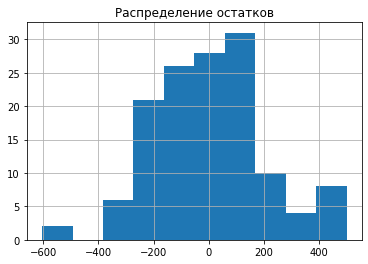

1.7982879824676274

In [83]:
X = need_data_th.drop('удой', axis = 1)
y = need_data_th['удой']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
categorical_cols = ['порода_папы_быка', 'возраст']
numeric_cols = ['жирность', 'эке', 'спо']
model_lr = LinearRegression()
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])

X_test_encoded = encoder.transform(X_test[categorical_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

X_train_processed = pd.concat([pd.DataFrame(X_train_scaled, columns=numeric_cols), pd.DataFrame(X_train_encoded.toarray(), columns=encoder.get_feature_names(categorical_cols))], axis=1)
X_test_processed = pd.concat([pd.DataFrame(X_test_scaled, columns=numeric_cols), pd.DataFrame(X_test_encoded.toarray(), columns=encoder.get_feature_names(categorical_cols))], axis=1)
model_lr.fit(X_train_processed, y_train)
predictions = model_lr.predict(X_test_processed)
r2 = r2_score(y_test, predictions)
residuals = pd.DataFrame({'y_test': y_test, 'predictions': predictions})
residuals['diff'] = residuals['y_test'] - residuals['predictions'] 
print(f'R^2 Score: {r2}')
print(f'RMSE = {mean_squared_error(y_test, predictions, squared = False)}')
residuals['diff'].hist(bins = 10)
plt.title('Распределение остатков')
plt.show()
residuals['diff'].mean()

Наблюдается рост значения метрики R^2 и понижение значения RMSE, значит векторы, которые мы отбросили на этапе формирования матрицы features все же улучшают показатели модели, а значит предел, выбранный мной чтобы отбрасывать векторы занижен. Вспомним, что столбец возраста сильно коррелирует с эке и спо, возможно он является их линейной комбинацией, стоит проверить качество модели при удалении этого признака. Так как mean в столбце остатков стал еще меньше - значит модель дает чаще завышенные прогнозы, также попробуем улучшить модель путем добавления еще одного признака

In [84]:
need_data_ft = data_ferma_main.loc[:, ['удой', 'порода_папы_быка', 'жирность', 'эке', 'спо', 'тип_пастбища']]
need_data_ft

,удой,порода_папы_быка,жирность,эке,спо,тип_пастбища
0,5863.0,айдиал,3.58,14.2,0.890,равнинное
1,5529.0,соверин,3.54,12.8,0.890,равнинные
2,5810.0,соверин,3.59,14.0,0.885,холмистое
3,5895.0,айдиал,3.40,12.4,0.885,холмистое
4,5302.0,соверин,3.73,12.8,0.885,равнинные
...,...,...,...,...,...,...
624,6812.0,айдиал,3.74,15.4,0.940,равнинное
625,5513.0,соверин,3.64,12.9,0.880,равнинное
626,5970.0,соверин,3.64,14.4,0.880,холмистое
627,5746.0,соверин,3.64,13.8,0.890,равнинное


R^2 Score: 0.8120770023587202
RMSE = 186.95931377002285


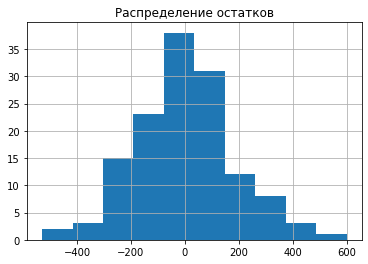

3.810528264244019

In [85]:
X = need_data_ft.drop('удой', axis = 1)
y = need_data_ft['удой']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
categorical_cols = ['порода_папы_быка', 'тип_пастбища']
numeric_cols = ['жирность', 'эке', 'спо']
model_lr = LinearRegression()
scaler = StandardScaler()
encoder = OneHotEncoder(drop='first', sparse=False)

X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])

X_test_encoded = encoder.transform(X_test[categorical_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])
X_train_processed = pd.concat([pd.DataFrame(X_train_scaled, columns=numeric_cols),
                                  pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names(categorical_cols))], axis=1)

X_test_processed = pd.concat([pd.DataFrame(X_test_scaled, columns=numeric_cols),
                                 pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names(categorical_cols))], axis=1)


model_lr.fit(X_train_processed, y_train)
predictions = model_lr.predict(X_test_processed)

r2 = r2_score(y_test, predictions)
residuals = pd.DataFrame({'y_test': y_test, 'predictions': predictions})
residuals['diff'] = residuals['y_test'] - residuals['predictions'] 
print(f'R^2 Score: {r2}')
print(f'RMSE = {mean_squared_error(y_test, predictions, squared = False)}')
residuals['diff'].hist(bins = 10)
plt.title('Распределение остатков')
plt.show()
residuals['diff'].mean()

Теперь показатель модели немного лучше, но значение RMSE еще ниже. Скорее это связано с вышеупомянутом предположением: \
$\vec{v}_{\text{возраст}} = a*\vec{v}_{\text{эке}} + b*\vec{v}_{\text{спо}} $, где  $a,b \neq 0$\
Следовательно, 
$X_{\text{features}} = ||\vec{v}_{\text{порода_папы_быка}} \quad \vec{v}_{\text{жирность}} \quad \vec{v}_{\text{эке}} \quad \vec{v}_{\text{спо}} \quad \vec{v}_{\text{тип пастбища}}||$, $\vec{v}_{\text{target}} = \text{удой}$ \
При этом значение mean в столбце остатков стал немного больше, значит предсказания модели чуть более заниженными

Посмотрим на диаграммы рассеивания удоя от количественных признаков еще раз, возможно получится как-то преобразовать данные чтобы улучшить качество модели:


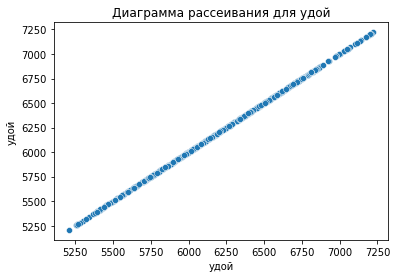

1.0


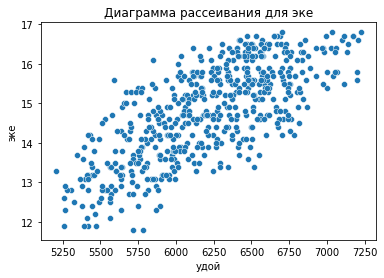

0.7296672464617022


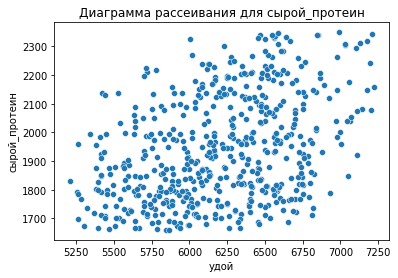

0.3900737855718723


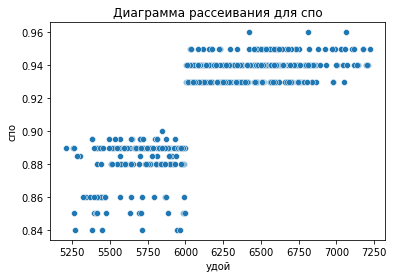

0.7952085974662948


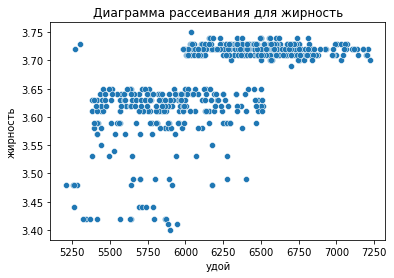

0.6468482765812102


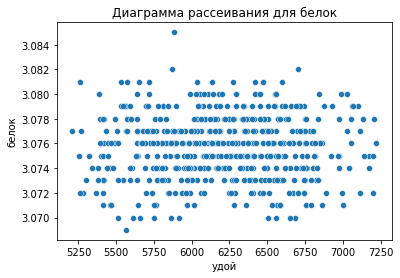

0.005678686264198526


In [86]:
for i in cols_numeric:
    sns.scatterplot(x = 'удой', y = i, data = data_ferma_main)
    plt.title(f'Диаграмма рассеивания для {i}')
    plt.show()
    print(data_ferma_main['удой'].corr(data_ferma_main[i]))

В первую очередь видно, что спо можно преобразовать в категориальный признак, хоть и коэффицент корреляции внушительный, возможно так для модели будет более информативной данная информация

In [87]:
def to_categ(str):
    if (str - 0.92) > 1e-8:
        return 'много'
    else:
        return 'не_очень'

need_data_ft['спо_категор'] = need_data_ft['спо'].apply(to_categ)
need_data_ft

,удой,порода_папы_быка,жирность,эке,спо,тип_пастбища,спо_категор
0,5863.0,айдиал,3.58,14.2,0.890,равнинное,не_очень
1,5529.0,соверин,3.54,12.8,0.890,равнинные,не_очень
2,5810.0,соверин,3.59,14.0,0.885,холмистое,не_очень
3,5895.0,айдиал,3.40,12.4,0.885,холмистое,не_очень
4,5302.0,соверин,3.73,12.8,0.885,равнинные,не_очень
...,...,...,...,...,...,...,...
624,6812.0,айдиал,3.74,15.4,0.940,равнинное,много
625,5513.0,соверин,3.64,12.9,0.880,равнинное,не_очень
626,5970.0,соверин,3.64,14.4,0.880,холмистое,не_очень
627,5746.0,соверин,3.64,13.8,0.890,равнинное,не_очень


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

Аналогично заметим, что эке связано не очень линейно с удоем, напоминает график некоторый наклонной кривой, введем столбец эке_кв = эке^2

In [88]:
need_data_ft['эке_кв'] = need_data_ft['эке'] * need_data_ft['эке']
need_data_ft

,удой,порода_папы_быка,жирность,эке,спо,тип_пастбища,спо_категор,эке_кв
0,5863.0,айдиал,3.58,14.2,0.890,равнинное,не_очень,201.64
1,5529.0,соверин,3.54,12.8,0.890,равнинные,не_очень,163.84
2,5810.0,соверин,3.59,14.0,0.885,холмистое,не_очень,196.00
3,5895.0,айдиал,3.40,12.4,0.885,холмистое,не_очень,153.76
4,5302.0,соверин,3.73,12.8,0.885,равнинные,не_очень,163.84
...,...,...,...,...,...,...,...,...
624,6812.0,айдиал,3.74,15.4,0.940,равнинное,много,237.16
625,5513.0,соверин,3.64,12.9,0.880,равнинное,не_очень,166.41
626,5970.0,соверин,3.64,14.4,0.880,холмистое,не_очень,207.36
627,5746.0,соверин,3.64,13.8,0.890,равнинное,не_очень,190.44


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

Обучим вторую модель по этим данным

R^2 Score: 0.8109303486479188
RMSE = 187.5288331194985


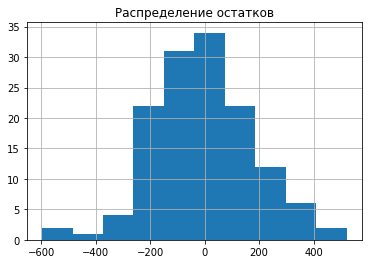

-4.0608432577828015

In [89]:
X = need_data_ft.drop('удой', axis = 1)
y = need_data_ft['удой']
X_train_sec, X_test_sec, y_train_sec, y_test_sec = train_test_split(X, y, random_state = 42)
categorical_cols = ['порода_папы_быка', 'тип_пастбища', 'спо_категор']
numeric_cols = ['жирность', 'эке_кв']
model_lr_sec = LinearRegression()
scaler = StandardScaler()
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded_sec = encoder.fit_transform(X_train_sec[categorical_cols])
X_train_scaled_sec = scaler.fit_transform(X_train_sec[numeric_cols])

X_test_encoded_sec = encoder.transform(X_test_sec[categorical_cols])
X_test_scaled_sec = scaler.transform(X_test_sec[numeric_cols])
X_train_processed_sec = pd.concat([pd.DataFrame(X_train_scaled_sec, columns=numeric_cols),
                                  pd.DataFrame(X_train_encoded_sec, columns=encoder.get_feature_names(categorical_cols))], axis=1)

X_test_processed_sec = pd.concat([pd.DataFrame(X_test_scaled_sec, columns=numeric_cols),
                                 pd.DataFrame(X_test_encoded_sec, columns=encoder.get_feature_names(categorical_cols))], axis=1)


model_lr_sec.fit(X_train_processed_sec, y_train_sec)
predictions_sec = model_lr_sec.predict(X_test_processed_sec)

r2_sec = r2_score(y_test_sec, predictions_sec)
rmse_sec = mean_squared_error(y_test_sec, predictions_sec, squared=False)
residuals_sec = pd.DataFrame({'y_test': y_test_sec, 'predictions': predictions_sec})
residuals_sec['diff'] = residuals_sec['y_test'] - residuals_sec['predictions'] 
print(f'R^2 Score: {r2_sec}')
print(f'RMSE = {rmse_sec}')
residuals_sec['diff'].hist(bins = 10)
plt.title('Распределение остатков')
plt.show()
residuals_sec['diff'].mean()

Сравним две модели:

In [90]:
print(f"R^2 first model: {r2}")
print(f"R^2 second model: {r2_sec}")
print(f"RMSE first model: {mean_squared_error(y_test, predictions, squared = False)}")
print(f"RMSE second model: {mean_squared_error(y_test_sec, predictions_sec, squared = False)}")

R^2 first model: 0.8120770023587202
R^2 second model: 0.8109303486479188
RMSE first model: 186.95931377002285
RMSE second model: 187.5288331194985


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

По коэффиценту детерминации и значению mean в столбце остатков можно сказать, что первая модель совсем немного работает лучше второй, но и вторая модель дает хорошие прогнозы, попробуем обучить третью модель, добавив признак имя_папы к категориальным признакам

In [91]:
data_ferma_dad['имя_папы'] = data_ferma_dad['имя_папы'].str.lower()
data_ferma_main_add = data_ferma_main.merge(data_ferma_dad, on='id').reset_index(drop=True)
if (data_ferma_main_add.shape[1] != data_ferma_main.shape[1] + 1):
    print("Ошибка в объединении таблиц")
data_ferma_main_add

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,имя_папы
0,1,5863.0,14.2,1743.0,0.890,вис_бик_айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,буйный
1,2,5529.0,12.8,2138.0,0.890,вис_бик_айдиал,равнинные,соверин,3.54,3.079,вкусно,менее_2_лет,соловчик
2,3,5810.0,14.0,1854.0,0.885,рефлешн_cоверинг,холмистое,соверин,3.59,3.074,не_вкусно,более_2_лет,барин
3,4,5895.0,12.4,2012.0,0.885,рефлешн_cоверинг,холмистое,айдиал,3.40,3.075,не_вкусно,более_2_лет,буйный
4,5,5302.0,12.8,1675.0,0.885,вис_бик_айдиал,равнинные,соверин,3.73,3.073,вкусно,менее_2_лет,барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,625,6812.0,15.4,1964.0,0.940,рефлешн_cоверинг,равнинное,айдиал,3.74,3.075,не_вкусно,более_2_лет,буйный
538,626,5513.0,12.9,1700.0,0.880,рефлешн_cоверинг,равнинное,соверин,3.64,3.073,вкусно,менее_2_лет,барин
539,627,5970.0,14.4,1837.0,0.880,рефлешн_cоверинг,холмистое,соверин,3.64,3.075,не_вкусно,более_2_лет,барин
540,628,5746.0,13.8,1994.0,0.890,рефлешн_cоверинг,равнинное,соверин,3.64,3.077,вкусно,более_2_лет,барин


In [92]:
need_data_five = data_ferma_main_add.loc[:, ['удой', 'порода_папы_быка', 'жирность', 'эке', 'спо', 'сырой_протеин', 'тип_пастбища', 'имя_папы']]
need_data_five['спо_категор'] = need_data_five['спо'].apply(to_categ)
need_data_five['эке_кв'] = need_data_five['эке'] * need_data_five['эке']
need_data_five

,удой,порода_папы_быка,жирность,эке,спо,сырой_протеин,тип_пастбища,имя_папы,спо_категор,эке_кв
0,5863.0,айдиал,3.58,14.2,0.890,1743.0,равнинное,буйный,не_очень,201.64
1,5529.0,соверин,3.54,12.8,0.890,2138.0,равнинные,соловчик,не_очень,163.84
2,5810.0,соверин,3.59,14.0,0.885,1854.0,холмистое,барин,не_очень,196.00
3,5895.0,айдиал,3.40,12.4,0.885,2012.0,холмистое,буйный,не_очень,153.76
4,5302.0,соверин,3.73,12.8,0.885,1675.0,равнинные,барин,не_очень,163.84
...,...,...,...,...,...,...,...,...,...,...
537,6812.0,айдиал,3.74,15.4,0.940,1964.0,равнинное,буйный,много,237.16
538,5513.0,соверин,3.64,12.9,0.880,1700.0,равнинное,барин,не_очень,166.41
539,5970.0,соверин,3.64,14.4,0.880,1837.0,холмистое,барин,не_очень,207.36
540,5746.0,соверин,3.64,13.8,0.890,1994.0,равнинное,барин,не_очень,190.44


R^2 Score: 0.8134382917460982
RMSE = 186.28092870982476


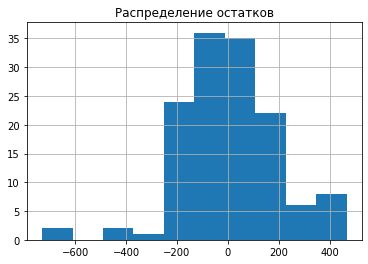

-0.19330572491052783

In [93]:
X = need_data_five.drop('удой', axis = 1)
y = need_data_five['удой']
X_train_th, X_test_th, y_train_th, y_test_th = train_test_split(X, y, random_state = 42)
model_lr_th = LinearRegression()
scaler = StandardScaler()
categorical_cols = ['порода_папы_быка', 'тип_пастбища', 'спо_категор', 'имя_папы']
numeric_cols = ['жирность', 'эке_кв']
encoder = OneHotEncoder(drop='first', sparse=False)

X_train_encoded_th = encoder.fit_transform(X_train_th[categorical_cols])
X_train_scaled_th = scaler.fit_transform(X_train_th[numeric_cols])

X_test_encoded_th = encoder.transform(X_test_th[categorical_cols])
X_test_scaled_th = scaler.transform(X_test_th[numeric_cols])
X_train_processed_th = pd.concat([pd.DataFrame(X_train_scaled_th, columns=numeric_cols),
                                  pd.DataFrame(X_train_encoded_th, columns=encoder.get_feature_names(categorical_cols))], axis=1)

X_test_processed_th = pd.concat([pd.DataFrame(X_test_scaled_th, columns=numeric_cols),
                                 pd.DataFrame(X_test_encoded_th, columns=encoder.get_feature_names(categorical_cols))], axis=1)


model_lr_th.fit(X_train_processed_th, y_train_th)
predictions_th = model_lr_th.predict(X_test_processed_th)

r2_th = r2_score(y_test_th, predictions_th)
rmse_th = mean_squared_error(y_test_th, predictions_th, squared=False)
residuals_th = pd.DataFrame({'y_test': y_test_th, 'predictions': predictions_th})
residuals_th['diff'] = residuals_th['y_test'] - residuals_th['predictions'] 
print(f'R^2 Score: {r2_th}')
print(f'RMSE = {rmse_th}')
residuals_th['diff'].hist(bins = 10)
plt.title('Распределение остатков')
plt.show()
residuals_th['diff'].mean()

Сравним три модели:

In [94]:
print(f"R^2 first model: {r2}")
print(f"R^2 second model: {r2_sec}")
print(f"R^2 third model: {r2_th}")
print(f"RMSE first model: {mean_squared_error(y_test, predictions, squared = False)}")
print(f"RMSE second model: {mean_squared_error(y_test_sec, predictions_sec, squared = False)}")
print(f"RMSE third model: {mean_squared_error(y_test_th, predictions_th, squared = False)}")

R^2 first model: 0.8120770023587202
R^2 second model: 0.8109303486479188
R^2 third model: 0.8134382917460982
RMSE first model: 186.95931377002285
RMSE second model: 187.5288331194985
RMSE third model: 186.28092870982476


Третья модель отрабатывает лучше двух предыдущих, но показатель mean в столбце остатков дает знать, что модель чаще дает завышенные ожидания, но значение очень близко к 0

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

Посмотрим количество уникальных значений среди имён быков, посмотрим, почему же имя папы быка влияет на удой

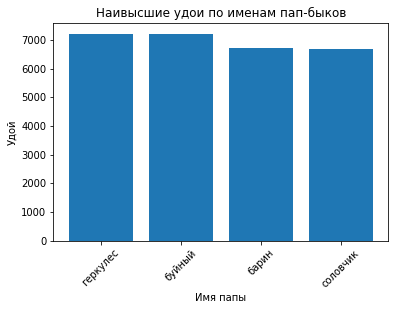

In [95]:
plt.bar(need_data_five.sort_values(by='удой', ascending=False)['имя_папы'], need_data_five.sort_values(by='удой', ascending=False)['удой'])
plt.xlabel('Имя папы')
plt.ylabel('Удой')
plt.title('Наивысшие удои по именам пап-быков')
plt.xticks(rotation=45)
plt.show()

In [96]:
need_data_five.phik_matrix()['удой'].sort_values(ascending=False)

interval columns not set, guessing: ['удой', 'жирность', 'эке', 'спо', 'сырой_протеин', 'эке_кв']


удой                1.000000
спо_категор         0.999683
эке_кв              0.711927
эке                 0.700580
жирность            0.698525
спо                 0.663398
порода_папы_быка    0.470537
имя_папы            0.462119
сырой_протеин       0.397644
тип_пастбища        0.255408
Name: удой, dtype: float64

По столбчатой диаграмме заметно, что коровы, чьих пап зовут Геркулес или Буйный приносят больше удоя чем коровы, чьих пап зовут Барин и Соловчик. Теперь ясно, почему третья модель срабатывает лучше остальных. \
Причем по количеству удоя на ферме можно предугадать родителя коровы, решая задачу мультиклассовой классификации

Проанализируем остатки всех 3-ех моделей:

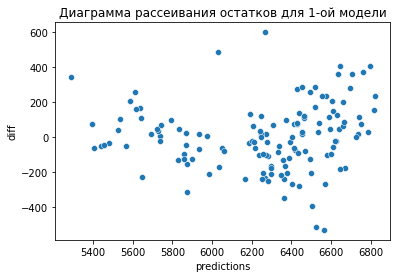

In [97]:
sns.scatterplot(data = residuals, x = 'predictions', y = 'diff')
plt.title(f'Диаграмма рассеивания остатков для 1-ой модели')
plt.show()

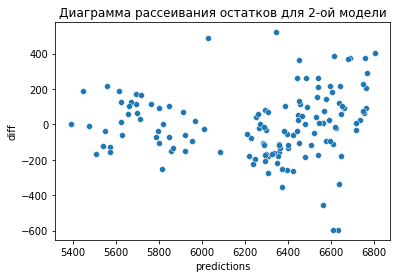

In [98]:
sns.scatterplot(data = residuals_sec, x = 'predictions', y = 'diff')
plt.title(f'Диаграмма рассеивания остатков для 2-ой модели')
plt.show()

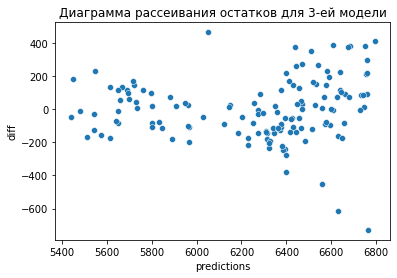

In [99]:
sns.scatterplot(data = residuals_th, x = 'predictions', y = 'diff')
plt.title(f'Диаграмма рассеивания остатков для 3-ей модели')
plt.show()

По диаграмме остатков заметно их непостояноство, а значит нужно устранять эту проблему, возможно стоит убрать признак

In [100]:
need_data_five.phik_matrix()['удой'].sort_values(ascending = False)

interval columns not set, guessing: ['удой', 'жирность', 'эке', 'спо', 'сырой_протеин', 'эке_кв']


удой                1.000000
спо_категор         0.999683
эке_кв              0.711927
эке                 0.700580
жирность            0.698525
спо                 0.663398
порода_папы_быка    0.470537
имя_папы            0.462119
сырой_протеин       0.397644
тип_пастбища        0.255408
Name: удой, dtype: float64

Заметим, что `спо_категор` имеет коэффицент корреляции почти равный 1, возможно он является линейной комбинацией остальных векторов, проверим это

In [101]:
need_data_five.phik_matrix()['спо_категор'].sort_values(ascending = False)

interval columns not set, guessing: ['удой', 'жирность', 'эке', 'спо', 'сырой_протеин', 'эке_кв']


спо                 1.000000
спо_категор         1.000000
удой                0.999683
жирность            0.911620
эке                 0.846890
эке_кв              0.846506
имя_папы            0.525025
сырой_протеин       0.445656
порода_папы_быка    0.193610
тип_пастбища        0.063765
Name: спо_категор, dtype: float64

Ну тут явно видно, что обнаружена сильная корреляция с `эке` и `эке_кв` соответственно, попробуем удалить столбец `спо_категор` из матрицы признаков, затем проверим метрики модели

R^2 Score: 0.8028368838584253
RMSE = 191.50052827448408


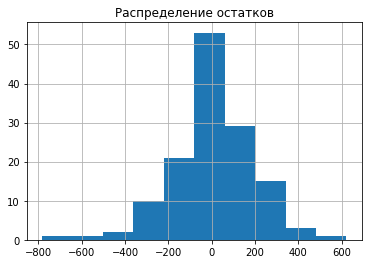

4.08548631968373


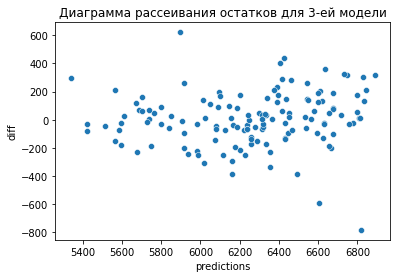

In [102]:
X = need_data_five.drop('удой', axis = 1)
y = need_data_five['удой']
X_train_th_new, X_test_th_new, y_train_th_new, y_test_th_new = train_test_split(X, y, random_state = 42)
model_lr_th_new = LinearRegression()
scaler = StandardScaler()
categorical_cols = ['порода_папы_быка', 'тип_пастбища', 'имя_папы']
numeric_cols = ['жирность', 'эке_кв']
encoder = OneHotEncoder(drop='first', sparse=False)

X_train_encoded_th_new = encoder.fit_transform(X_train_th_new[categorical_cols])
X_train_scaled_th_new = scaler.fit_transform(X_train_th_new[numeric_cols])

X_test_encoded_th_new = encoder.transform(X_test_th_new[categorical_cols])
X_test_scaled_th_new = scaler.transform(X_test_th_new[numeric_cols])
X_train_processed_th_new = pd.concat([pd.DataFrame(X_train_scaled_th_new, columns=numeric_cols),
                                  pd.DataFrame(X_train_encoded_th_new, columns=encoder.get_feature_names(categorical_cols))], axis=1)

X_test_processed_th_new = pd.concat([pd.DataFrame(X_test_scaled_th_new, columns=numeric_cols),
                                 pd.DataFrame(X_test_encoded_th_new, columns=encoder.get_feature_names(categorical_cols))], axis=1)


model_lr_th_new.fit(X_train_processed_th_new, y_train_th_new)
predictions_th_new = model_lr_th_new.predict(X_test_processed_th_new)

r2_th_new = r2_score(y_test_th_new, predictions_th_new)
rmse_th_new = mean_squared_error(y_test_th_new, predictions_th_new, squared=False)
residuals_th_new = pd.DataFrame({'y_test': y_test_th_new, 'predictions': predictions_th_new})
residuals_th_new['diff'] = residuals_th_new['y_test'] - residuals_th_new['predictions'] 
print(f'R^2 Score: {r2_th_new}')
print(f'RMSE = {rmse_th_new}')
residuals_th_new['diff'].hist(bins = 10)
plt.title('Распределение остатков')
plt.show()
print(residuals_th_new['diff'].mean())
sns.scatterplot(data = residuals_th_new, x = 'predictions', y = 'diff')
plt.title(f'Диаграмма рассеивания остатков для 3-ей модели')
plt.show()

Значение коэффицента детерминации стало чуть меньше, RMSE стало больше, а mean значение из столбца остатков стал > 0, чуть больше по модулю, чем предыдущее значение. \
Модель стала работать лучше, с точки зрения бизнеса, лучше получать mean > 0, чем обратную ситуацию. Лучше мы будем предсказывать немного меньше, чем есть на самом деле, чем будем получать завышенные прогнозы. Оставим данную модель финальной версией для предсказания удоя. Сравним все модели по метрикам:

In [103]:
def print_stats(resid_data, confidence_level=0.95):
    mae = mean_absolute_error(resid_data['y_test'], resid_data['predictions'])
    mse = mean_squared_error(resid_data['y_test'], resid_data['predictions'])
    rmse = mean_squared_error(resid_data['y_test'], resid_data['predictions'], squared=False)
    r2 = r2_score(resid_data['y_test'], resid_data['predictions'])
    mean_residuals = resid_data['diff'].mean()

    residuals_std = np.std(resid_data['diff'])
    z_value = stats.norm.ppf((1 + confidence_level) / 2)
    lower_bound = mean_residuals - z_value * residuals_std
    upper_bound = mean_residuals + z_value * residuals_std

    print(f"MAE = {mae}")
    print(f"MSE = {mse}")
    print(f"RMSE = {rmse}")
    print(f"R^2 = {r2}")
    print(f"Mean residuals = {mean_residuals}")
    print(f"Confidence Interval ({confidence_level * 100}%): ({lower_bound}, {upper_bound})")
    print()

print("Первая модель")
print_stats(residuals)
print("Вторая модель")
print_stats(residuals_sec)
print("Третья модель")
print_stats(residuals_th)
print("Третья модель без спо")
print_stats(residuals_th_new)


Первая модель
MAE = 143.1501455459708
MSE = 34953.78500535785
RMSE = 186.95931377002285
R^2 = 0.8120770023587202
Mean residuals = 3.810528264244019
Confidence Interval (95.0%): (-362.5468754561015, 370.1679319845895)

Вторая модель
MAE = 143.91677467939002
MSE = 35167.06325116072
RMSE = 187.5288331194985
R^2 = 0.8109303486479188
Mean residuals = -4.0608432577828015
Confidence Interval (95.0%): (-371.5244168909934, 363.40273037542784)

Третья модель
MAE = 141.60366891674047
MSE = 34700.58440099481
RMSE = 186.28092870982476
R^2 = 0.8134382917460982
Mean residuals = -0.19330572491052783
Confidence Interval (95.0%): (-365.2970204228768, 364.9104089730557)

Третья модель без спо
MAE = 141.36704239057258
MSE = 36672.45232940648
RMSE = 191.50052827448408
R^2 = 0.8028368838584253
Mean residuals = 4.08548631968373
Confidence Interval (95.0%): (-371.16322710342615, 379.33419974279366)



<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

In [104]:
data_cow_buy['эке_кв'] = (data_ferma_main_add['эке'].mean() * 1.05)**2
data_cow_buy['спо'] = data_ferma_main_add['спо'].mean() * 1.05
data_cow_buy['сырой_протеин'] = data_ferma_main_add['сырой_протеин'].mean() * 1.05
data_cow_buy.rename(columns={'текущая_жирность': 'жирность'}, inplace=True)

data_cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,текущий_уровень_белок,возраст,эке_кв,спо,сырой_протеин
0,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,240.937983,0.96446,2040.44059
1,вис_бик_айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,240.937983,0.96446,2040.44059
2,рефлешн_cоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,240.937983,0.96446,2040.44059
3,рефлешн_cоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,240.937983,0.96446,2040.44059
4,рефлешн_cоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,240.937983,0.96446,2040.44059
5,рефлешн_cоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,240.937983,0.96446,2040.44059
6,вис_бик_айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,240.937983,0.96446,2040.44059
7,рефлешн_cоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,240.937983,0.96446,2040.44059
8,вис_бик_айдиал,холмистое,соверин,соловчик,3.73,3.055,более_2_лет,240.937983,0.96446,2040.44059
9,рефлешн_cоверинг,равнинное,соверин,геркулес,3.73,3.073,более_2_лет,240.937983,0.96446,2040.44059


In [105]:
need_data_five

,удой,порода_папы_быка,жирность,эке,спо,сырой_протеин,тип_пастбища,имя_папы,спо_категор,эке_кв
0,5863.0,айдиал,3.58,14.2,0.890,1743.0,равнинное,буйный,не_очень,201.64
1,5529.0,соверин,3.54,12.8,0.890,2138.0,равнинные,соловчик,не_очень,163.84
2,5810.0,соверин,3.59,14.0,0.885,1854.0,холмистое,барин,не_очень,196.00
3,5895.0,айдиал,3.40,12.4,0.885,2012.0,холмистое,буйный,не_очень,153.76
4,5302.0,соверин,3.73,12.8,0.885,1675.0,равнинные,барин,не_очень,163.84
...,...,...,...,...,...,...,...,...,...,...
537,6812.0,айдиал,3.74,15.4,0.940,1964.0,равнинное,буйный,много,237.16
538,5513.0,соверин,3.64,12.9,0.880,1700.0,равнинное,барин,не_очень,166.41
539,5970.0,соверин,3.64,14.4,0.880,1837.0,холмистое,барин,не_очень,207.36
540,5746.0,соверин,3.64,13.8,0.890,1994.0,равнинное,барин,не_очень,190.44


In [106]:
numeric_cols = ['жирность', 'эке_кв']
X_test_encoded_buy = encoder.transform(data_cow_buy[categorical_cols])
X_test_scaled_buy = scaler.transform(data_cow_buy[numeric_cols])
X_test_processed_buy = pd.concat([pd.DataFrame(X_test_scaled_buy, columns=numeric_cols),
                                 pd.DataFrame(X_test_encoded_buy, columns=encoder.get_feature_names(categorical_cols))], axis=1)

predictions_th_new = model_lr_th_new.predict(X_test_processed_buy)
data_cow_buy['ожид_удой'] = predictions_th_new
data_cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,текущий_уровень_белок,возраст,эке_кв,спо,сырой_протеин,ожид_удой
0,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,240.937983,0.96446,2040.44059,6423.272540
1,вис_бик_айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,240.937983,0.96446,2040.44059,6263.551707
2,рефлешн_cоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,240.937983,0.96446,2040.44059,5961.081952
3,рефлешн_cоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,240.937983,0.96446,2040.44059,6129.722652
4,рефлешн_cоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,240.937983,0.96446,2040.44059,6460.412520
5,рефлешн_cоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,240.937983,0.96446,2040.44059,6403.287213
6,вис_бик_айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,240.937983,0.96446,2040.44059,6314.823167
7,рефлешн_cоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,240.937983,0.96446,2040.44059,6129.722652
8,вис_бик_айдиал,холмистое,соверин,соловчик,3.73,3.055,более_2_лет,240.937983,0.96446,2040.44059,6353.527204
9,рефлешн_cоверинг,равнинное,соверин,геркулес,3.73,3.073,более_2_лет,240.937983,0.96446,2040.44059,6574.192081


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Прогноз верный.</font>

### Итог по модели прогнозирования удоя
Удалось протестировать несколько моделей для прогнозирования целевого признака - удоя, но самой лучшей я посчитал третью из-за лучшей дисперсии остатков и хороших показателей метрик, причем я посчитал важным выбрать модель, которая чаще дает заниженные прогнозы, так как в рамках бизнеса уж лучше мы будем прогнозировать чуть меньше чем есть на самом деле, но все-таки важно, чтоб среднее значение в векторе остатков не было слишком большим по модулю, вдруг на ферме просто не будет хватать бидонов для молока(как пример проблемы)

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

### Задача классификации

Необходимо обучить модель для решения задачи бинарной классификации, чтобы определять, будет ли молоко вкусным или нет. Для это стоит взглянуть на матрицу корреляции, чтобы понять, с какими признаками коррелирует целевой признак - вкус_молока

In [107]:
data_ferma_main.phik_matrix()['вкус_молока'].sort_values(ascending = False)

interval columns not set, guessing: ['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок']


вкус_молока         1.000000
спо                 0.583759
эке                 0.303141
жирность            0.175315
сырой_протеин       0.149871
белок               0.147270
удой                0.137477
возраст             0.099328
тип_пастбища        0.074581
id                  0.000000
порода              0.000000
порода_папы_быка    0.000000
Name: вкус_молока, dtype: float64

Заметим, что спо и эке больше всех влияют на вкус молока, стоит добавить эти два признака к матрице features, также добавим тип_пастбища:

In [108]:
data_need_class = data_ferma_main.loc[:, ['спо', 'эке', 'тип_пастбища', 'вкус_молока']]
num_cols = ['спо', 'эке']
categ_cols = ['тип_пастбища']
data_need_class


,спо,эке,тип_пастбища,вкус_молока
0,0.890,14.2,равнинное,вкусно
1,0.890,12.8,равнинные,вкусно
2,0.885,14.0,холмистое,не_вкусно
3,0.885,12.4,холмистое,не_вкусно
4,0.885,12.8,равнинные,вкусно
...,...,...,...,...
624,0.940,15.4,равнинное,не_вкусно
625,0.880,12.9,равнинное,вкусно
626,0.880,14.4,холмистое,не_вкусно
627,0.890,13.8,равнинное,вкусно


In [109]:
def print_info(y_true, predictions):
    print(f"Accuracy = {accuracy_score(y_true, predictions)}")
    print(f"Recall = {recall_score(y_true, predictions, pos_label='не_вкусно')}")
    print(f"Precision = {precision_score(y_true, predictions, pos_label='не_вкусно')}")
    cm = confusion_matrix(y_true, predictions)
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues_r')
    plt.ylabel('Истинный класс')
    plt.xlabel('Предсказанный класс')


Accuracy = 0.6176470588235294
Recall = 0.24
Precision = 0.46153846153846156


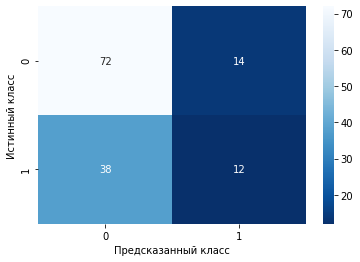

In [110]:
y = data_need_class['вкус_молока']
X = data_need_class.drop('вкус_молока', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
encoder = OneHotEncoder(drop='first', sparse=False)
scaler = StandardScaler()
model_cl = LogisticRegression()
X_train_scaled = scaler.fit_transform(X_train[num_cols])
X_train_encoder = encoder.fit_transform(X_train[categ_cols])
X_test_scaled = scaler.transform(X_test[num_cols])
X_test_encoder = encoder.transform(X_test[categ_cols])
X_train_processed_class = pd.concat([pd.DataFrame(X_train_scaled, columns=num_cols),
                                  pd.DataFrame(X_train_encoder, columns=encoder.get_feature_names(categ_cols))], axis=1)

X_test_processed_class = pd.concat([pd.DataFrame(X_test_scaled, columns=num_cols),
                                 pd.DataFrame(X_test_encoder, columns=encoder.get_feature_names(categ_cols))], axis=1)

model_cl.fit(X_train_processed_class, y_train)
predictions = model_cl.predict(X_test_processed_class)
print_info(y_test, predictions)

По метрикам видноm, что точность модели составляет 0.625, неплохое значение, но стоит его улучшить. Также взглянув на матрицу ошибок, можно заметить что точность присваивания класса 'не_вкусно' равна примерно 0.48, что не очень хорошо. Также метрика recall показывает, смогла ли модель присвоить класс 'не_вкусно' всем объектам этого класса - 0.24, что весьма плохо 

<font color='blue'><b>Комментарий ревьюера: </b></font> \
<font color='blue'> Метрика recall показывает сколько 'не вкусного' не попало во 'вкусное'. Нам нужно максимизровать эту метрику, чтобы риск купить корову с не вкусным молоком был равен 0.</font>

Попробуем изменить набор признаков для улучшения модели

In [111]:
data_need_class = data_ferma_main
num_cols = ['спо', 'жирность', 'белок', 'сырой_протеин']
categ_cols = ['тип_пастбища']
data_ferma_main.phik_matrix()['вкус_молока'].sort_values(ascending = False)

interval columns not set, guessing: ['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок']


вкус_молока         1.000000
спо                 0.583759
эке                 0.303141
жирность            0.175315
сырой_протеин       0.149871
белок               0.147270
удой                0.137477
возраст             0.099328
тип_пастбища        0.074581
id                  0.000000
порода              0.000000
порода_папы_быка    0.000000
Name: вкус_молока, dtype: float64

Accuracy = 0.6102941176470589
Recall = 0.22
Precision = 0.44


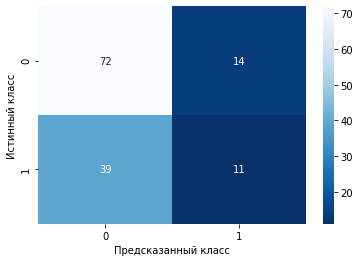

In [112]:
y = data_need_class['вкус_молока']
X = data_need_class.drop('вкус_молока', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
encoder = OneHotEncoder(drop='first', sparse=False)
scaler = StandardScaler()
model_cl = LogisticRegression()
X_train_scaled = scaler.fit_transform(X_train[num_cols])
X_train_encoder = encoder.fit_transform(X_train[categ_cols])
X_test_scaled = scaler.transform(X_test[num_cols])
X_test_encoder = encoder.transform(X_test[categ_cols])
X_train_processed_class = pd.concat([pd.DataFrame(X_train_scaled, columns=num_cols),
                                  pd.DataFrame(X_train_encoder, columns=encoder.get_feature_names(categ_cols))], axis=1)

X_test_processed_class = pd.concat([pd.DataFrame(X_test_scaled, columns=num_cols),
                                 pd.DataFrame(X_test_encoder, columns=encoder.get_feature_names(categ_cols))], axis=1)

model_cl.fit(X_train_processed_class, y_train)
predictions = model_cl.predict(X_test_processed_class)
print_info(y_test, predictions)

Показатели метрик немного улучшились, теперь стоит понять, ошибку какого рода нам необходимо минимизировать: \
Фермер хочет купить коров, которые дают вкусное молоко, так как классу 1 соответствует класс не_вкусно, то нам нужно минимизировать ошибки второго рода, тем самым увеличить значение recall. Введем пороги

In [113]:
y_proba = model_cl.predict_proba(X_test_processed_class)[:, 1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba']).sort_values(by = 'y_proba', ascending = False)
data

,y_valid,y_proba
7,не_вкусно,0.674330
135,вкусно,0.648503
121,вкусно,0.644230
71,не_вкусно,0.636344
21,вкусно,0.621798
...,...,...
4,вкусно,0.226163
22,вкусно,0.222639
65,вкусно,0.220121
42,вкусно,0.205853


In [114]:
thresholds = [round(i, 2) for i in np.linspace(0.1, 1, num = 7, endpoint = False)]
thresholds

[0.1, 0.23, 0.36, 0.49, 0.61, 0.74, 0.87]

In [115]:
columns = []


for i in thresholds:
	columns.append('y_pred_'+str(i))
	data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x > i else 0)


display(data.sample(5))
best_threshold = 0.265

,y_valid,y_proba,y_pred_0.1,y_pred_0.23,y_pred_0.36,y_pred_0.49,y_pred_0.61,y_pred_0.74,y_pred_0.87
35,не_вкусно,0.317571,1,1,0,0,0,0,0
65,вкусно,0.220121,1,0,0,0,0,0,0
52,вкусно,0.395739,1,1,1,0,0,0,0
80,вкусно,0.320574,1,1,0,0,0,0,0
133,вкусно,0.300475,1,1,0,0,0,0,0


In [116]:
new_data = []
for i in y_proba:
    if i - best_threshold > 1e-8:
        new_data.append('не_вкусно')
    else:
        new_data.append('вкусно')

Accuracy = 0.4632352941176471
Recall = 1.0
Precision = 0.4065040650406504


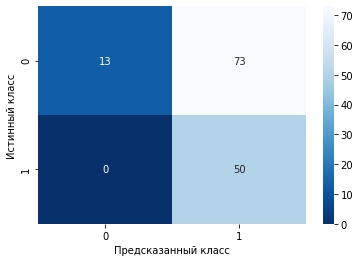

In [117]:
print_info(y_test, new_data)

Путем небольшого перебора порогов можно заметить, что при пороге 0.265 модель больше не причисляет коров с не вкусным молоком к коровам с вкусным, а значит теперь фермер сможет приобрести 13 коров, чье молоко будет вкусным. Если фермеру нужно больше коров, то модель будет ошибаться, это нормально. Посмотрим, сколько ошибок может совершить модель, если фермеру нужно 25 коров

Accuracy = 0.4852941176470588
Recall = 0.92
Precision = 0.4107142857142857


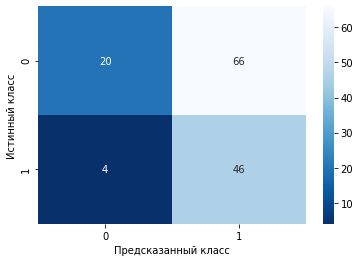

In [118]:
best_threshold = 0.287
new_data = []
for i in y_proba:
    if i - best_threshold > 1e-8:
        new_data.append('не_вкусно')
    else:
        new_data.append('вкусно')
print_info(y_test, new_data)

При значении порога = 0.287, мы получаем примерно 4 коровы с не вкусным молоком, зато 20 коров будут приносить необходимое, то есть примерно 83% коров будут приносить вкусное молоко, что в принципе довольно неплохо. Но если речь идет о покупке с минимальными рискам, то стоит пользоваться прошлым порогом

<font color='blue'><b>Комментарий ревьюера : </b></font> \
<font color='blue'>Судя по матрице, 65 коров с невкусным молоком выданы за вкусное. Думаю у фермера будут вопросы к DS специалисту )).</font>

<font color='purple'><b>Комментарий студента: </b></font> \
<font color='purple'>Ты скорее перепутал, если я не ошибаюсь, класс 0 - вкусное молоко, 1 - не вкусное, тогда получается, что 66 коров с вкусным молоком выданы за не вкусное</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> \
<font color='blue'> В контексте нашего датасета с характеристиками коров и классификацией вкуса молока на два класса ("не вкусное" и "вкусное"), класс "вкусное" является позитивным классом для подсчета Recall и Precision. В данном случае, мы хотим точно определить, какие характеристики коров связаны с вкусным молоком, поэтому интерес представляет именно этот класс при оценке качества модели.

Для подсчета Recall и Precision в этом контексте, "вкусное" молоко будет считаться позитивным и будет использоваться в качестве основы для расчета метрик.</font>

In [119]:
y_test.value_counts()

вкусно       86
не_вкусно    50
Name: вкус_молока, dtype: int64

Спрогнозируем вкус молока на основе имеющихся данных:

In [120]:
data_cow_buy.rename(columns={'текущий_уровень_белок': 'белок'}, inplace=True)

In [121]:
X_predict_scaled = scaler.transform(data_cow_buy[num_cols])
X_predict_encoder = encoder.transform(data_cow_buy[categ_cols])

X_predict_processed_class = pd.concat([pd.DataFrame(X_predict_scaled, columns=num_cols),
                                 pd.DataFrame(X_predict_encoder, columns=encoder.get_feature_names(categ_cols))], axis=1)

y_proba = model_cl.predict_proba(X_predict_processed_class)[:, 1]
best_threshold = 0.265
predictions = []
for i in y_proba:
    if i - best_threshold > 1e-8:
        predictions.append('не_вкусно')
    else:
        predictions.append('вкусно')
predictions

['вкусно',
 'не_вкусно',
 'не_вкусно',
 'не_вкусно',
 'не_вкусно',
 'не_вкусно',
 'не_вкусно',
 'вкусно',
 'не_вкусно',
 'не_вкусно',
 'не_вкусно',
 'не_вкусно',
 'не_вкусно',
 'вкусно',
 'не_вкусно',
 'не_вкусно']

Если фермер не хочет рисковать, то он может быть почти полностью уверен в трех коровах, согласно предсказанию

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

Соберем таблицу для покупки коров вместе с предсказаниями

In [122]:
data_cow_buy['вкус_молока'] = predictions
data_cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке_кв,спо,сырой_протеин,ожид_удой,вкус_молока
0,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,240.937983,0.96446,2040.44059,6423.272540,вкусно
1,вис_бик_айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,240.937983,0.96446,2040.44059,6263.551707,не_вкусно
2,рефлешн_cоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,240.937983,0.96446,2040.44059,5961.081952,не_вкусно
3,рефлешн_cоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,240.937983,0.96446,2040.44059,6129.722652,не_вкусно
4,рефлешн_cоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,240.937983,0.96446,2040.44059,6460.412520,не_вкусно
5,рефлешн_cоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,240.937983,0.96446,2040.44059,6403.287213,не_вкусно
6,вис_бик_айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,240.937983,0.96446,2040.44059,6314.823167,не_вкусно
7,рефлешн_cоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,240.937983,0.96446,2040.44059,6129.722652,вкусно
8,вис_бик_айдиал,холмистое,соверин,соловчик,3.73,3.055,более_2_лет,240.937983,0.96446,2040.44059,6353.527204,не_вкусно
9,рефлешн_cоверинг,равнинное,соверин,геркулес,3.73,3.073,более_2_лет,240.937983,0.96446,2040.44059,6574.192081,не_вкусно


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

### Итог по задаче классификации
Удалось обучить модель, благодаря которой фермер сможет с минимальными рисками находить примерно 13 коров, молоко которых будет вкусным, также если речь будет о количестве, но соблюдая вкус молока(например фермеру нужно купить 25 коров), то при повышении порога, фермер сможет купить примерно 21 корову с вкусным молоком на 4 с не вкусным, это вполне хороший показатель. \
В качестве входных признаков я взял: 'спо', 'жирность', 'белок', 'сырой_протеин', 'тип_пастбища', благодаря данному набору признаков удалось добиться вышеперечисленных показателей про риски покупки коров с вкусным молоком

### Итог по работе
В ходе выполнения данного проекта мне удалось помочь ферме с прогнозированием удоя коровы, подлежащей покупке, а также с прогнозированием вкуса ее молока. Так как фермеру было важно минимизировать риски покупки коровы с не вкусным молоком, то я обучил такую модель логистической регрессии, благодаря которой фермер сможет с минимальными рисками находить примерно 13 коров, молоко которых будет вкусным, также если речь будет о количестве, но соблюдая вкус молока(например фермеру нужно купить 25 коров), то при повышении порога, фермер сможет купить примерно 21 корову с вкусным молоком на 4 с не вкусным, это вполне хороший показатель.
В качестве входных признаков я взял: 'спо', 'жирность', 'белок', 'сырой_протеин', 'тип_пастбища', благодаря данному набору признаков удалось добиться вышеперечисленных показателей про риски покупки коров с вкусным молоко. При обучении модели линейной регрессии я поработал с несколькими моделями, после сравнения трех моделей я выбрал третью из-за лучшей дисперсии остатков и хороших показателей метрик, причем посчитал важным выбрать модель, которая чаще дает заниженные прогнозы, так как в рамках бизнеса уж лучше мы будем прогнозировать чуть меньше чем есть на самом деле, но все-таки важно, чтоб среднее значение в векторе остатков не было слишком большим по модулю, вдруг на ферме просто не будет хватать бидонов для молока(как пример проблемы) \
Помимо решения главной проблемы я занимался предобработкой данных и исследовательским анализом, вот выводы с этих этапов работы: \

#### Вывод по предобработке данных
В ходе предобработки данных мне удалось выявить и устранить следующие проблемы:
- Привел названия колонок к нижнему регистру, убрал лишние слова и добавил корректные разделители
- Проверил данные на наличие пропущенных значений и явных дубликатов
- Устранил явные дубликаты
- Устранил неявные дубликат
- Выполнил приведение типов

#### Вывод по исследовательскому анализу
В ходе исследовательского анализа удалось разделить данные на количественные и категориальные, затем провести анализ каждого столбца путем построения диаграмм, можно выделить следующие важные факты:
- обнаружен выброс в столбце удоя, было принято решение заменить его наиболее подходящим по другим параметрам коровы (медианным среди подобных коров), скорее всего произошла опечатка в ходе заполнения данных, так как данное значение слишком сильное превосходит все другие значения в столбце.
- наблюдаем немного скошенное вправо распределение, чем-то напоминающее нормальное, для стобца ЭКЕ, данные корректны и не содержат выбросов. Минимальное значени - 10.9, медианное значение - 14.7, максимальное значение - 16.8.
- в столбце содержания сырого протеина также не обнаружено никаких выбросов, потому никаких всопомогательных операций по улучшению данных не производилось. Медианное значение почти достигает 1900 грамм, при этом максимальное и минимальное значение равно 2349 и 1660 грамм соответственно.
- в столбце сахаро-протеинового соотношения не обнаружено никаких выбросов. Медианна достигает почти 0.95, а минимальное значение равно 0.84, максимальное - 0.96.
- в столбце процентного содержания жира в молоке были обнаружены выбросы, но думаю нельзя считать эти данные неверными, так как вполне реально получать не такое жирное молоко.
- в столбце содержания белка были обнаружены выбросы, скорее всего это просто уникальные значения в единичном экземпляре. Так как стандартное отклонение крайне мало, то не будем удалять данные значения.
- коров породы Вис Бик Айдиал больше чем коров породы Рефлешн Соверинг примерно в 1.46 раза.
- холмистых пастбищ примерно в 1.26 больше чем равнинных.
- быков, чьи папы породы Айдиал примерно столько же, сколько быков, чьи папы породы Соверин.
- вкусного молока примерно в 1.44 раза больше чем не вкусного, но все же процент не вкусного молока внушительный (41%).
- быков старше двух лет почти в 5 раз больше быков младше двух.

Также я провел корреляционный анализ данных:
#### Вывод по корреляционному анализу
По диаграммам видно, что id никак не коррелирует с целевым признаком, в то время как эке очень напоминает линейную зависимость, так же можно сказать про показатель сырого протеина, коэффицент корреляции меньше, но линейная зависимость также наблюдается. Для спо мы наблюдаем график не похожий на предыдущие, но также напоминает линейную зависимость. \ 
В диаграмме жирности мы наблюдаем линейную зависимость похожую как с спо, но `выбросы` показывают, что никак не коррелируют целевым признаком, при обучении модели нужно будет отбросить эти значения, возможно они ухудшат показатели модели. \
Белок почти никак не коррелирует с целевым признаком. \
По диаграммам категориальных признаков можно сказать, как распределены те или иные признаки относительно значений удоя, а именно:
- Так как породы распределены почти одинаково, то очевидно, что коэффицент корреляции будет мал (0,16)
- Тип пастбища показывает, что максимальное значение удоя наблюдается именно на холимостом пастбище, но коэффицент все же мал
- Коэффицент корреляции от породы папы быка заметный (0,51), по диаграмме заметно, что быки с папами-Айдиалами могут приносить больше удоя
- По диаграмме видно, что вкус молока имеет слабую корреляцию с целевым признаком, скорее всего это связано с тем, что 41% не вкусного молока все же внушительное значение, потому и встречается оно довольно часто
- В свою очередь возраст сильно коррелирует с показателем удоя, коровы с возрастом более двух лет почти гарантированно будут приносить больше удоя чем молодые коровы
- Эке хорошо коррелирует с жирностью и возрастом, но при этом жирность заметно коррелирует с возрастом, возможно стоит исключить эке, так как этот столбец может ухудшить показатели модели. Аналогично можно поступить с стобцом спо, он хорошо коррелирует с возрастом. Проще говоря отбросим столбцы, где коэффицент корреляции с каким либо входным признаком превышает 0.7
- После подрбного изучения свойств входных признаков получилась такая матрица  $X_{\text{features}} = ||\vec{v}_{\text{порода\_папы\_быка}}  \quad \vec{v}_{\text{тип\_пастбища}}  \quad \vec{v}_{\text{имя\_папы}} \quad \vec{v}_{\text{жирность}} \quad \vec{v}_{\text{эке\_кв}}||$, $\vec{v}_{\text{target}} = \text{удой}$ 

Выберем коров, молоко которых будет вкусным, а удой за год превысит 6000 кг

In [123]:
data_cow_buy.query('ожид_удой > 6000 and вкус_молока == "вкусно"')

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке_кв,спо,сырой_протеин,ожид_удой,вкус_молока
0,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,240.937983,0.96446,2040.44059,6423.272540,вкусно
7,рефлешн_cоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,240.937983,0.96446,2040.44059,6129.722652,вкусно
13,вис_бик_айдиал,холмистое,соверин,соловчик,3.73,3.079,более_2_лет,240.937983,0.96446,2040.44059,6353.527204,вкусно


Я бы порекомендовал фермеру приобрести эти три коровы, так как согласно прогнозу моделей, они соответствуют его ожидаемым признакам. Повторюсь, что если ферма хочет закупить больше двух коров, то она так же может воспользоваться прогнозом этих моделей, стоит лишь изменить порог в логистической, но риски будут выше минимальных, однако тут речь идет о количестве, все-таки 17% короов с невкусным молоком не так страшно, когда у тебя получилось купить 20 подходящих. 


#### Методы улучшения моделей 
В данном проекте я исследовал входные признаки на корреляцию с целевым, а также исследовал каждый признак на мультикорреляцию, отбрасывая признаки, являющиеся линейной комбинацией нескольких других. Помимо этого, чтобы учесть нелинейные зависимости между признаками и целевым параметром я возводил признак в квадрат. Также удалось обучить модель, где было удобно преобразовать количественный признак в категориальный, так как диаграмма рассеивания явно показала о наличии двух отдельных кластеров с явно-видимой границей между ними. В каждой модели линейной регрессии я проанализировал остатки, а именно их дисперсию среднее значение, потому выбрал лучшей крайнюю версию(более подробно описано выше в начале итогов) \
Модель логистической регрессии можно улучшить, но не намного, путем добавления дополнительных входных признаков. Но так как здесь речь шла о минимализации рисков покупки коров с не вкусным молоком, то я оставил такую версию, которая находится в этом проекте(в других попытках я не смог получить значения > 13 правильно выбранных коров) \
В моделях классификации важно учитывать такие метрики как recall, precision, accuracy. accuracy показывает точность предсказания. Зачастую в бизнесе используются именно эти три метрики, когда нам необходимо выбрать, чем мы готовы жертвовать для достижения одного из результатов. Например в данном проекте мы минимизировали ошибки, когда корову с не вкусным молоком относят к коровам с вкусным, потому мы максимизировали показатель recall, если бы задача была противоположной, то следовало максимизировать показатель precision. В случае, когда нам важно просто делать как можно точные предсказания, то необходимо увеличивать показатель accuracy

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Иван, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
Выводы и рассуждения получились содержательными, их было интересно читать.
</font>

<font color='steelblue'>Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.

Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)

Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.

Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)</font>

<font color='blue'><b>Жду твой проект на повторном ревью. До встречи :) </b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 3</b></font>\
<font color='green'> Иван, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>